In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import math
from matplotlib.backends.backend_pdf import PdfPages
%matplotlib inline
import warnings
warnings.filterwarnings(action='ignore')

pd.options.mode.chained_assignment = None

df = pd.read_csv('CreditRisk-18206039.csv',  keep_default_na=True, sep=',\s+', delimiter=',', skipinitialspace=True)

# (1). Data Quality Report

In [5]:
print("Rows:", df.shape[0])
print("Columns:", df.shape[1])

Rows: 1000
Columns: 24


Our dataset includes 24 columns and 1000 rows. Below are the first and last 5 rows:

In [6]:
df.head(5) 

,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,...,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance
0,Bad,73,147,4,66,20,0,0,100,-7,...,50,-7,0,0,74,76,5,4,1,100
1,Good,88,206,2,79,25,0,0,100,-7,...,56,0,3,3,0,74,0,3,-8,43
2,Bad,77,166,2,86,19,0,0,100,-7,...,20,2,2,2,44,-8,5,2,0,70
3,Bad,65,121,9,48,20,1,1,95,14,...,25,0,0,0,49,42,6,3,0,75
4,Good,77,178,5,80,18,0,0,100,-7,...,39,4,2,2,24,-8,4,1,0,71


In [4]:
df.tail(5)

,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,...,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance
995,Good,80,51,30,41,9,0,0,100,-7,...,33,8,0,0,18,-8,2,1,1,60
996,Good,73,327,5,107,32,0,0,97,71,...,31,10,0,0,43,52,5,4,1,69
997,Bad,82,192,8,88,17,0,0,94,81,...,35,-7,0,0,0,92,1,2,0,38
998,Bad,57,171,2,50,16,1,1,89,9,...,21,0,4,4,49,79,9,3,2,71
999,Good,80,248,9,141,27,0,0,100,-7,...,30,-7,1,1,23,91,2,3,1,56


Let us view the current data types of our features:

In [7]:
df.dtypes

RiskPerformance                       object
ExternalRiskEstimate                   int64
MSinceOldestTradeOpen                  int64
MSinceMostRecentTradeOpen              int64
AverageMInFile                         int64
NumSatisfactoryTrades                  int64
NumTrades60Ever2DerogPubRec            int64
NumTrades90Ever2DerogPubRec            int64
PercentTradesNeverDelq                 int64
MSinceMostRecentDelq                   int64
MaxDelq2PublicRecLast12M               int64
MaxDelqEver                            int64
NumTotalTrades                         int64
NumTradesOpeninLast12M                 int64
PercentInstallTrades                   int64
MSinceMostRecentInqexcl7days           int64
NumInqLast6M                           int64
NumInqLast6Mexcl7days                  int64
NetFractionRevolvingBurden             int64
NetFractionInstallBurden               int64
NumRevolvingTradesWBalance             int64
NumInstallTradesWBalance               int64
NumBank2Na

Based on examining the data in a spreadsheet program, the following decisions were made about the data conversions:
 - RiskPerformance, which is type object, will be converted to categorical as it only contains two possible values, 'Bad' or 'Good'.
 - MaxDelq/PublicRecLast12M and MaxDelqEver will be converted to categorical from int64 as they contain a finite set of possible values, representing different bins of days delinquent. 
 - All other features were found to be continuous and will be left as type int64.

In [8]:
continuous_columns = df[['ExternalRiskEstimate','MSinceOldestTradeOpen','MSinceMostRecentTradeOpen','AverageMInFile','NumSatisfactoryTrades','NumTrades60Ever2DerogPubRec','NumTrades90Ever2DerogPubRec','PercentTradesNeverDelq','MSinceMostRecentDelq','NumTotalTrades','NumTradesOpeninLast12M','PercentInstallTrades','MSinceMostRecentInqexcl7days','NumInqLast6M','NumInqLast6Mexcl7days','NetFractionRevolvingBurden','NetFractionInstallBurden','NumRevolvingTradesWBalance','NumInstallTradesWBalance','NumBank2NatlTradesWHighUtilization','PercentTradesWBalance']].columns

In [9]:
categorical_columns = df[['RiskPerformance','MaxDelq2PublicRecLast12M','MaxDelqEver']].columns

In [10]:
#converting the categorical columns
for column in categorical_columns:
    df[column] = df[column].astype('category')
    
df.dtypes

RiskPerformance                       category
ExternalRiskEstimate                     int64
MSinceOldestTradeOpen                    int64
MSinceMostRecentTradeOpen                int64
AverageMInFile                           int64
NumSatisfactoryTrades                    int64
NumTrades60Ever2DerogPubRec              int64
NumTrades90Ever2DerogPubRec              int64
PercentTradesNeverDelq                   int64
MSinceMostRecentDelq                     int64
MaxDelq2PublicRecLast12M              category
MaxDelqEver                           category
NumTotalTrades                           int64
NumTradesOpeninLast12M                   int64
PercentInstallTrades                     int64
MSinceMostRecentInqexcl7days             int64
NumInqLast6M                             int64
NumInqLast6Mexcl7days                    int64
NetFractionRevolvingBurden               int64
NetFractionInstallBurden                 int64
NumRevolvingTradesWBalance               int64
NumInstallTra

We will now check the data for duplicate columns and rows:

In [11]:
#checking for duplicate rows
print('Duplicate rows:', df.duplicated()[df.duplicated() == True].shape[0])
# Checking for duplicate columns
print('Duplicate columns:',df.columns.size - df.columns.unique().size)

Duplicate rows: 55
Duplicate columns: 0


55 duplicate rows have been found, which are displayed below:

In [12]:
df[df.duplicated(keep=False)]

,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,...,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance
5,Bad,-9,-9,-9,-9,-9,-9,-9,-9,-9,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9
55,Good,-9,-9,-9,-9,-9,-9,-9,-9,-9,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9
62,Good,-9,-9,-9,-9,-9,-9,-9,-9,-9,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9
70,Bad,-9,-9,-9,-9,-9,-9,-9,-9,-9,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9
75,Bad,-9,-9,-9,-9,-9,-9,-9,-9,-9,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9
92,Bad,-9,-9,-9,-9,-9,-9,-9,-9,-9,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9
109,Good,-9,-9,-9,-9,-9,-9,-9,-9,-9,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9
135,Bad,-9,-9,-9,-9,-9,-9,-9,-9,-9,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9
143,Bad,-9,-9,-9,-9,-9,-9,-9,-9,-9,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9
149,Bad,-9,-9,-9,-9,-9,-9,-9,-9,-9,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9


All of the duplicate rows contain only the value -9 for all features except RiskPerformance (the target feature), which is a special value used in this dataset to represent missing data. Therefore, these duplicate rows will be dropped.

In [13]:
df = df.drop_duplicates(subset=None, keep=False)

In [14]:
#checking for duplicate rows
print('Duplicate rows:', df.duplicated()[df.duplicated() == True].shape[0])
# Checking for duplicate columns
print('Duplicate columns:',df.columns.size - df.columns.unique().size)

Duplicate rows: 0
Duplicate columns: 0


We will now check for constant columns by examining the standard deviations of ours continuous features:

In [15]:
df[continuous_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
ExternalRiskEstimate,943.0,71.817603,10.473129,-9.0,64.0,72.0,80.0,92.0
MSinceOldestTradeOpen,943.0,196.037116,101.039153,-8.0,129.0,181.0,252.5,590.0
MSinceMostRecentTradeOpen,943.0,9.667020,13.337026,0.0,3.0,6.0,12.0,184.0
AverageMInFile,943.0,79.463415,36.269141,7.0,57.0,75.0,96.0,258.0
NumSatisfactoryTrades,943.0,20.923648,11.026435,1.0,13.0,20.0,27.0,74.0
NumTrades60Ever2DerogPubRec,943.0,0.617179,1.306850,0.0,0.0,0.0,1.0,12.0
NumTrades90Ever2DerogPubRec,943.0,0.379639,1.009556,0.0,0.0,0.0,0.0,12.0
PercentTradesNeverDelq,943.0,92.217391,11.887317,20.0,88.5,97.0,100.0,100.0
MSinceMostRecentDelq,943.0,7.202545,20.321783,-8.0,-7.0,-7.0,14.0,81.0
NumTotalTrades,943.0,22.686108,12.637905,0.0,14.0,21.0,29.0,78.0


As standard deviation is not zero for any columns, we can conclude that none of the continous features are constant.

However, the table above reveals that NumTrades60Ever2DerogPubRec and NumTrades90Ever2DerogPubRec have an extremely similar mean and standard deviation as well as identical first quartiles, second quartiles and maxs. We can also see that NumInqLast6M and NumInqLast6Mexcl7days also have an extremely similar mean and standard deviation, as well as identical first, second and third quartiles and maxs. Below, we investigate what percentage of values these columns share:

In [16]:
(df['NumTrades60Ever2DerogPubRec'] == df['NumTrades90Ever2DerogPubRec']).value_counts(normalize=True) * 100

True     85.04772
False    14.95228
dtype: float64

In [17]:
(df['NumInqLast6M'] == df['NumInqLast6Mexcl7days']).value_counts(normalize=True) * 100

True     95.546129
False     4.453871
dtype: float64

NumInqLast6M and NumInqLast6Mexcl7days share over 95% of their values, while NumTrades60Ever2DerogPubRec and NumTrades90Ever2DerogPubRec share roughly 85%.   

As 90% identical values is generally considered to be sufficient for a column to be considered a duplicate, we will drop the feature NumInqLast6Mexcl7days (rather than NumInqLast6M, as the latter contains more data).

We will retain both NumTrades60Ever2DerogPubRec and NumTrades90Ever2DerogPubRec, as they do not have sufficient identical values for one to be considered a duplicate.   

In [18]:
df = df.drop('NumInqLast6Mexcl7days', axis=1)
#removing NumInqLast6Mexcl7days from continuous_columns
continuous_columns = df[['ExternalRiskEstimate','MSinceOldestTradeOpen','MSinceMostRecentTradeOpen','AverageMInFile','NumSatisfactoryTrades','NumTrades60Ever2DerogPubRec','NumTrades90Ever2DerogPubRec','PercentTradesNeverDelq','MSinceMostRecentDelq','NumTotalTrades','NumTradesOpeninLast12M','PercentInstallTrades','MSinceMostRecentInqexcl7days','NumInqLast6M','NetFractionRevolvingBurden','NetFractionInstallBurden','NumRevolvingTradesWBalance','NumInstallTradesWBalance','NumBank2NatlTradesWHighUtilization','PercentTradesWBalance']].columns

We will now save our cleaned dataframe:

In [19]:
df.to_csv('CleanedData.csv', index=False)

The table below displays descriptive statistics for our cleaned continous features:

In [20]:
df.select_dtypes(['int64']).describe().T

,count,mean,std,min,25%,50%,75%,max
ExternalRiskEstimate,943.0,71.817603,10.473129,-9.0,64.0,72.0,80.0,92.0
MSinceOldestTradeOpen,943.0,196.037116,101.039153,-8.0,129.0,181.0,252.5,590.0
MSinceMostRecentTradeOpen,943.0,9.667020,13.337026,0.0,3.0,6.0,12.0,184.0
AverageMInFile,943.0,79.463415,36.269141,7.0,57.0,75.0,96.0,258.0
NumSatisfactoryTrades,943.0,20.923648,11.026435,1.0,13.0,20.0,27.0,74.0
NumTrades60Ever2DerogPubRec,943.0,0.617179,1.306850,0.0,0.0,0.0,1.0,12.0
NumTrades90Ever2DerogPubRec,943.0,0.379639,1.009556,0.0,0.0,0.0,0.0,12.0
PercentTradesNeverDelq,943.0,92.217391,11.887317,20.0,88.5,97.0,100.0,100.0
MSinceMostRecentDelq,943.0,7.202545,20.321783,-8.0,-7.0,-7.0,14.0,81.0
NumTotalTrades,943.0,22.686108,12.637905,0.0,14.0,21.0,29.0,78.0


While this table displays descriptive statistics for our cleaned categorical features:

In [21]:
df.select_dtypes(['category']).describe().T

,count,unique,top,freq
RiskPerformance,943,2,Bad,486
MaxDelq2PublicRecLast12M,943,8,7,408
MaxDelqEver,943,7,8,436


As MaxDelqEver and MaxDelq2PublicRecLast12M were initially type int64 variables, we can also examine these features as if they were continous variables to gain some additional insight into the data:

In [22]:
delinquency_categorical_columns = df[['MaxDelq2PublicRecLast12M','MaxDelqEver']].columns

In [23]:
for column in delinquency_categorical_columns:
    df[column] = df[column].astype('int64')

In [24]:
df[delinquency_categorical_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
MaxDelq2PublicRecLast12M,943.0,5.749735,1.687640,0.0,6.0,6.0,7.0,7.0
MaxDelqEver,943.0,6.406151,1.816253,2.0,6.0,6.0,8.0,8.0


In [25]:
#converting MaxDelq2PublicRecLast12 and MaxDelqEver back to categorical
for column in delinquency_categorical_columns:
    df[column] = df[column].astype('category')

Displayed below is a histogram for each of our continuous features illustrating the distribution of their values across automatically generated bins:

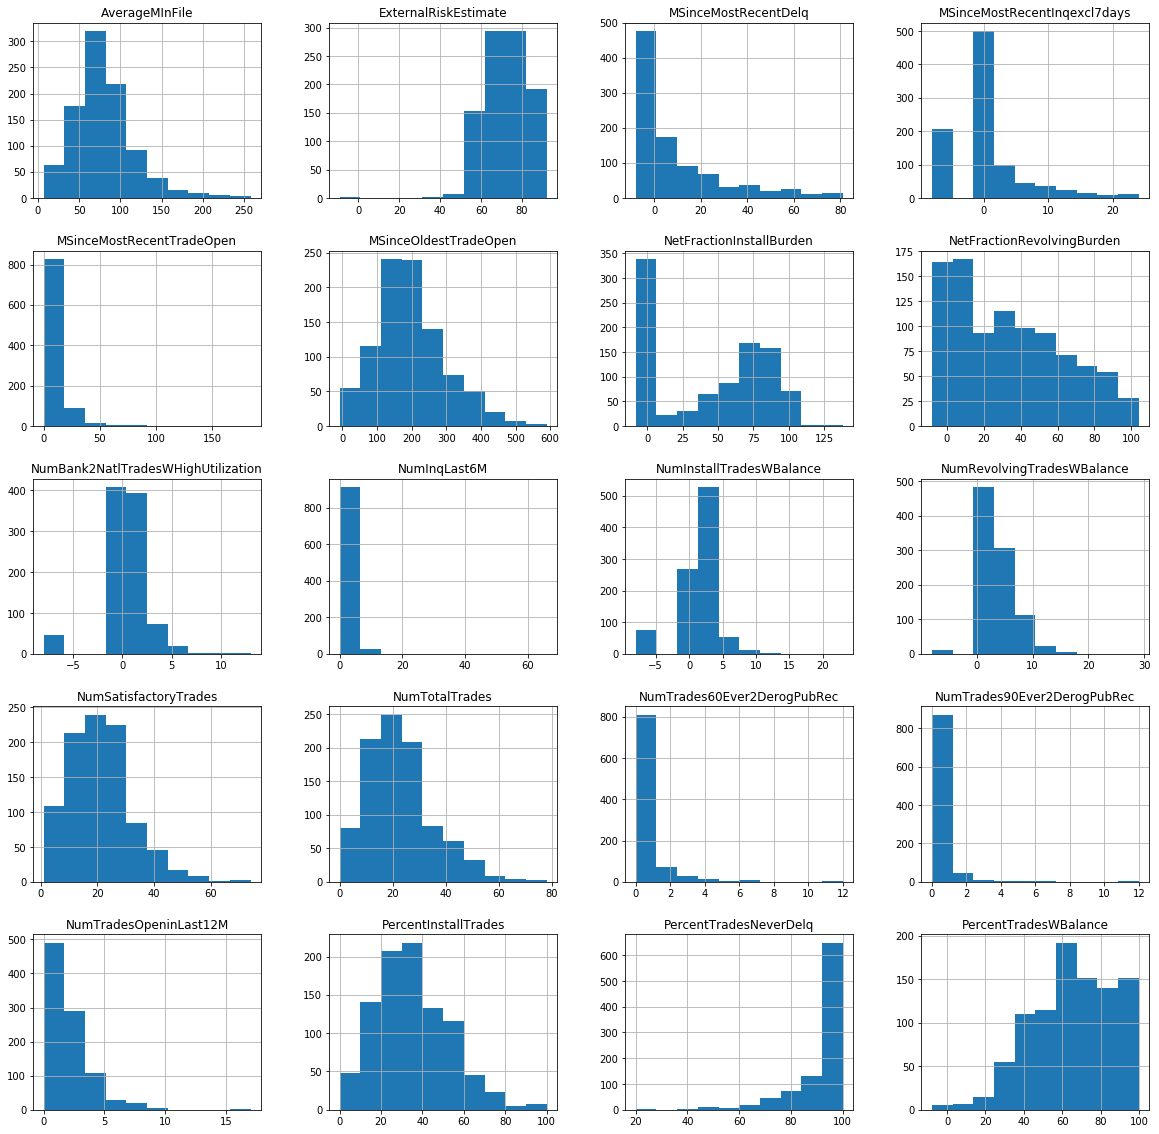

In [26]:
df[continuous_columns].hist(figsize=(20,20))
plt.savefig('continuous_histograms.pdf')

Presented below is a boxplot for each continuous feature illustrating it's quartiles and outliers:

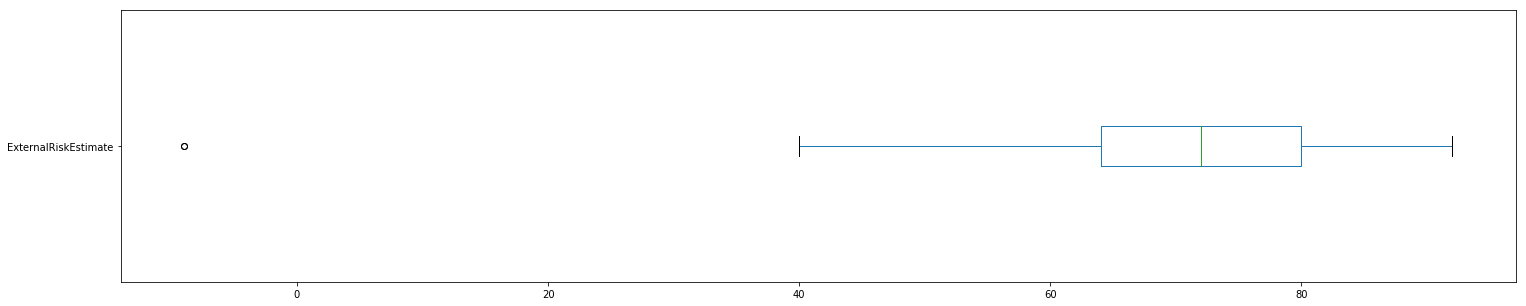

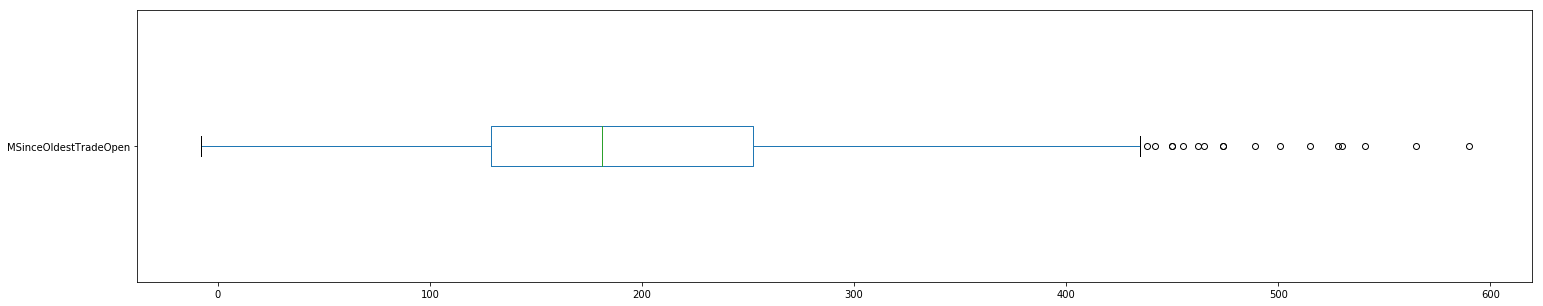

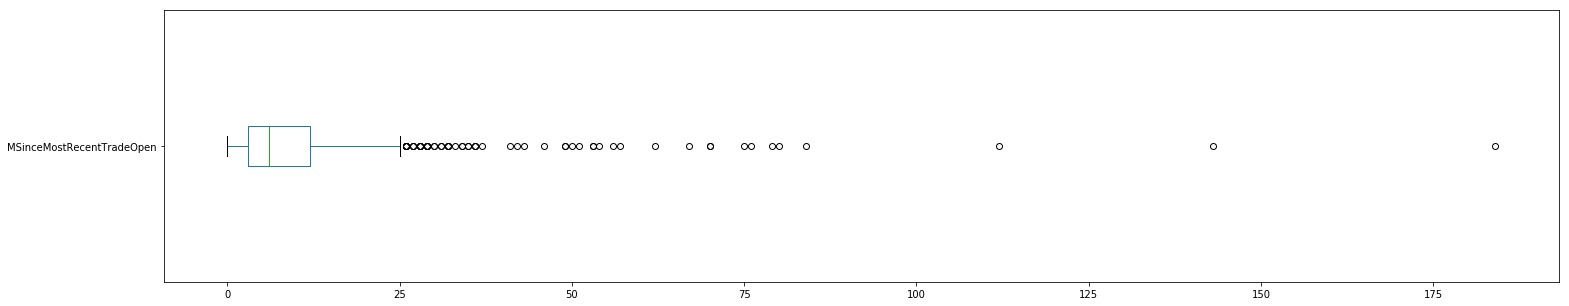

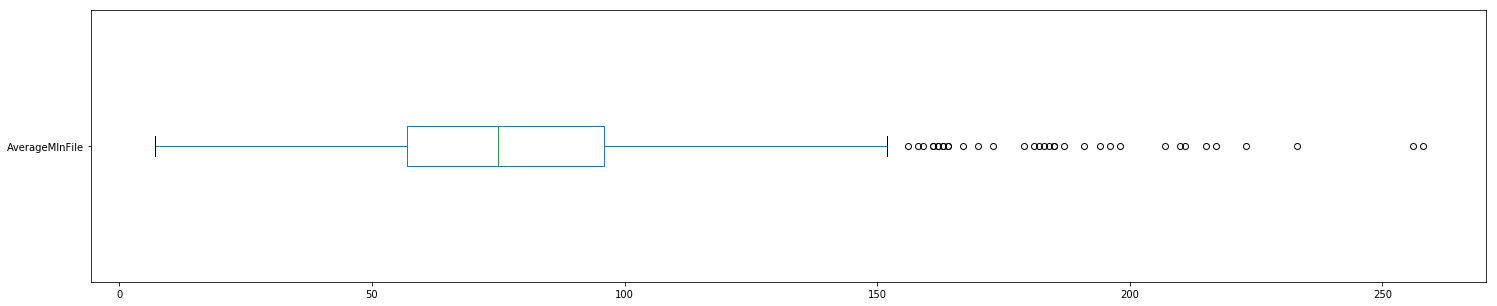

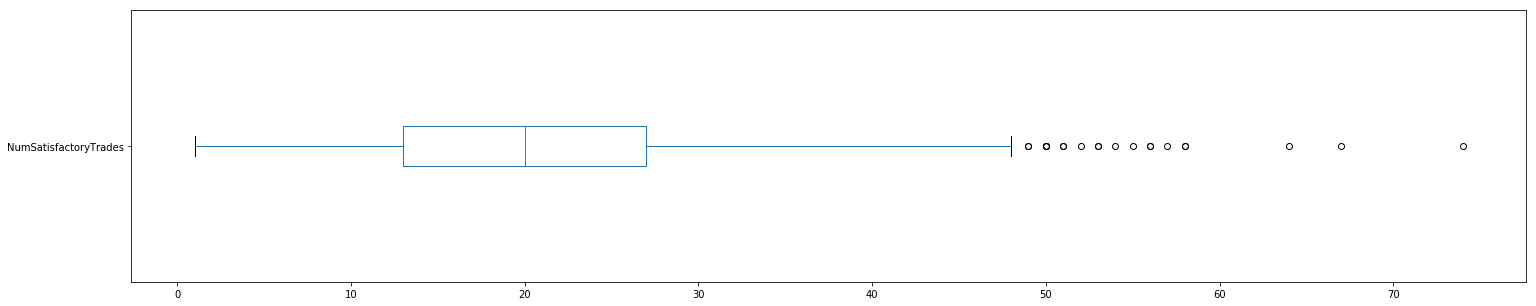

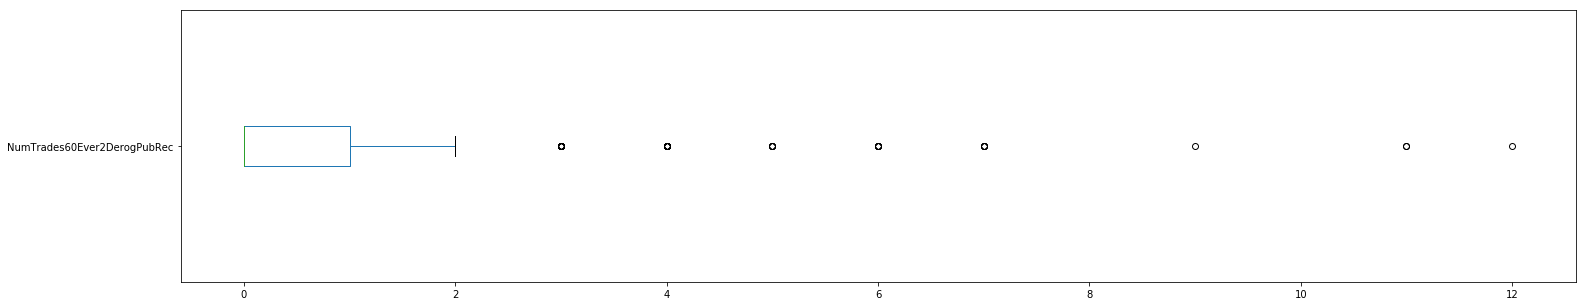

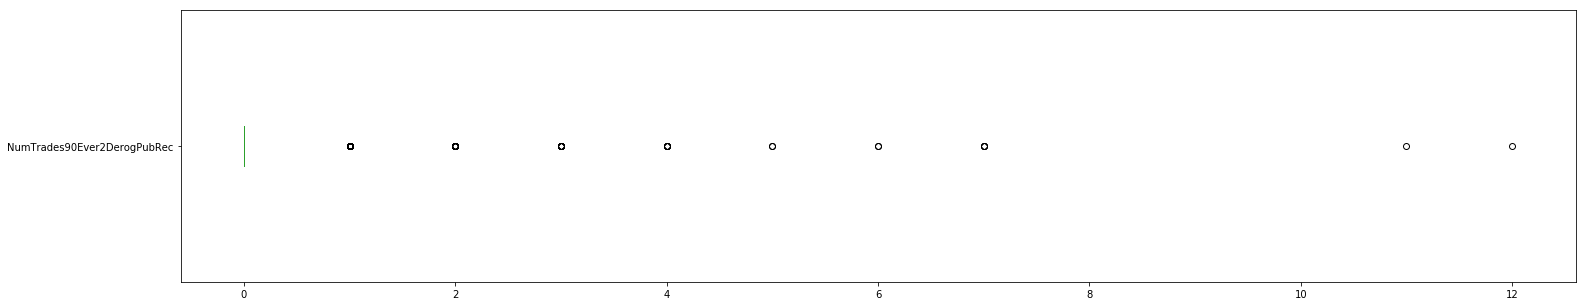

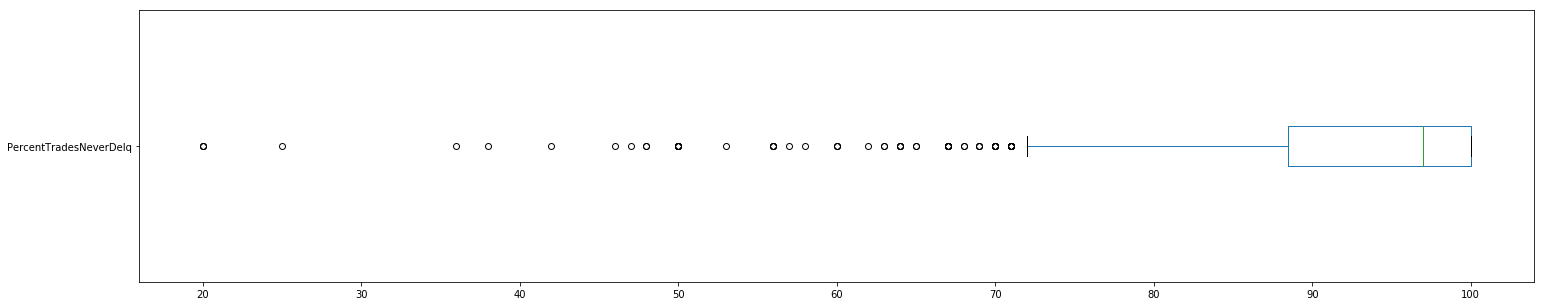

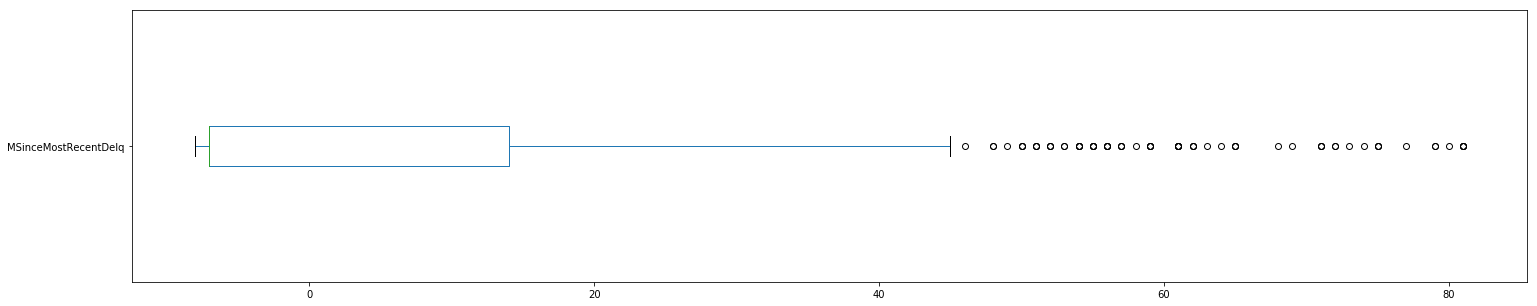

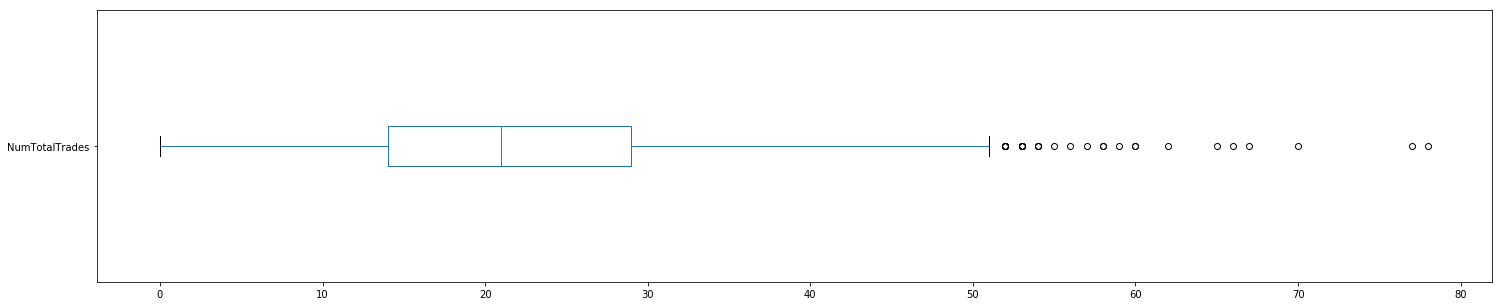

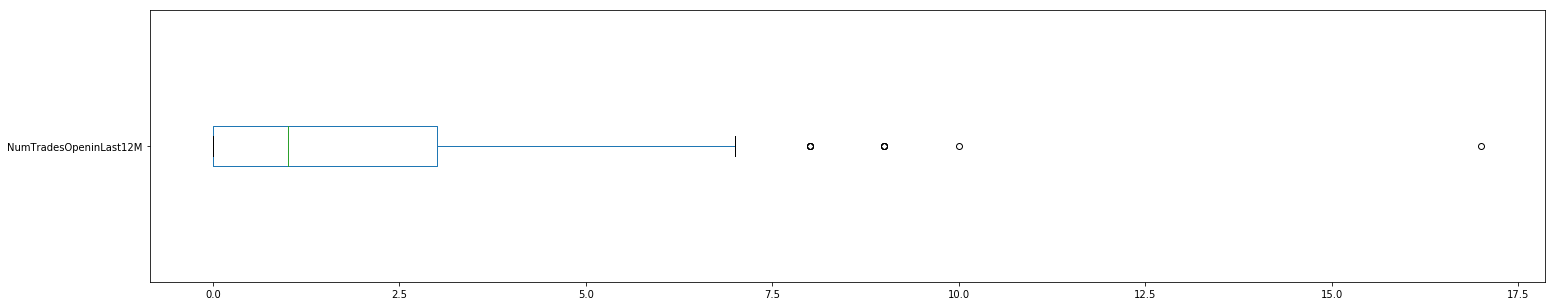

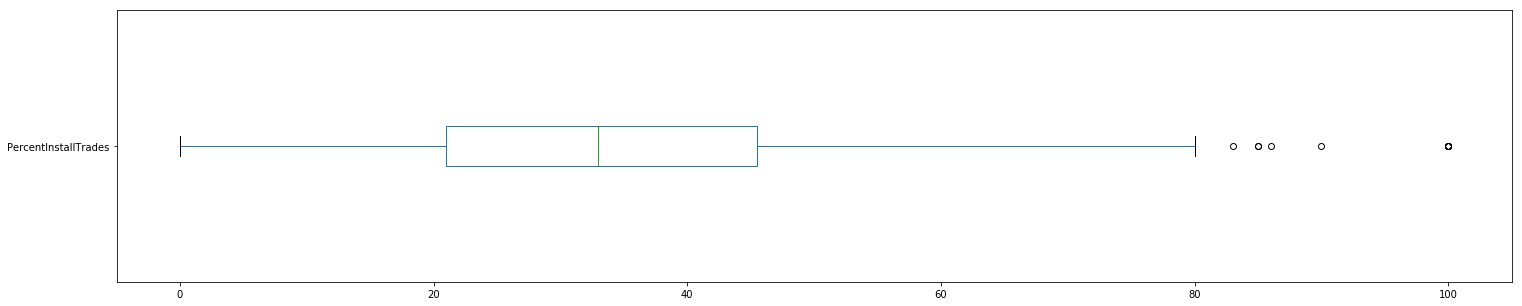

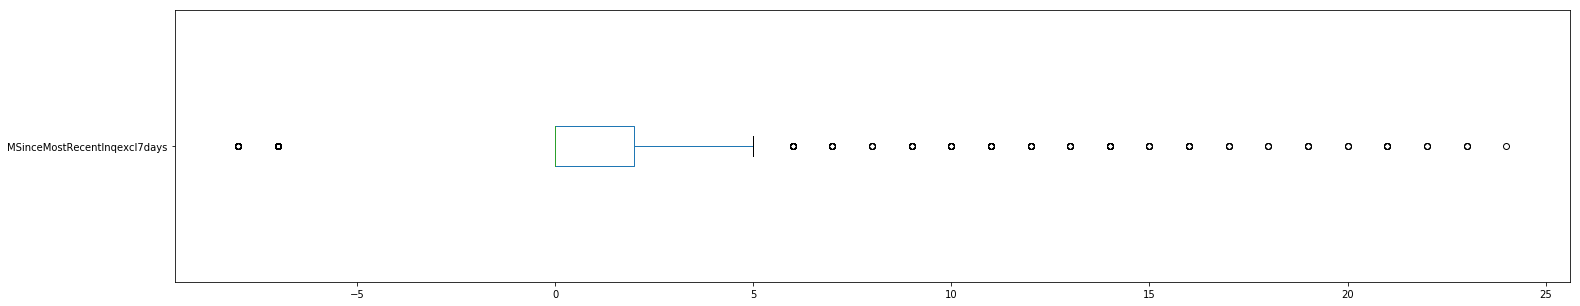

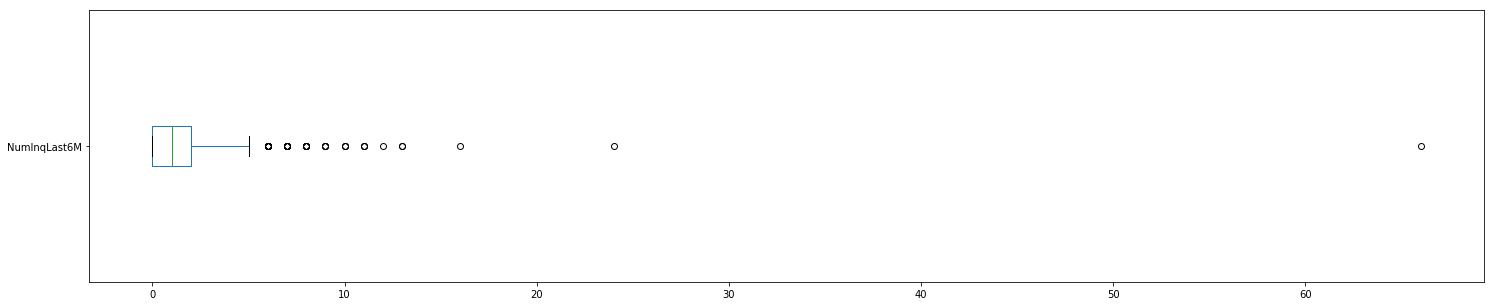

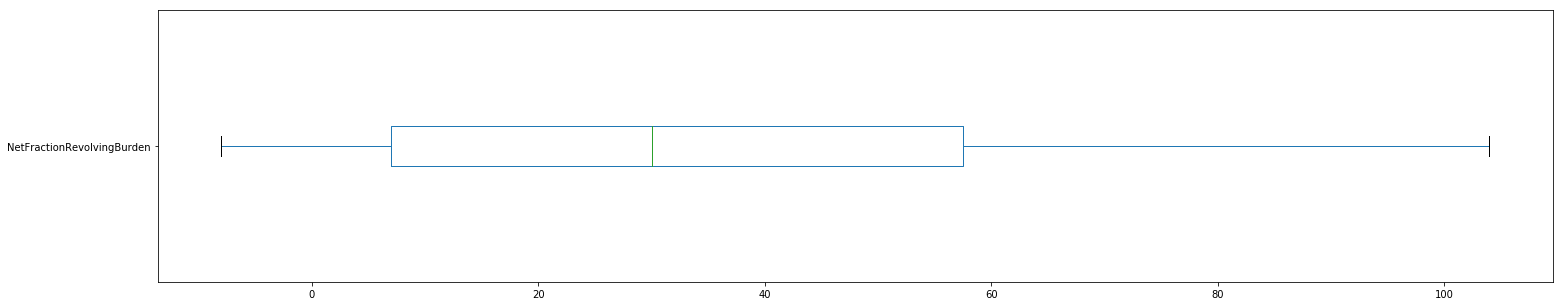

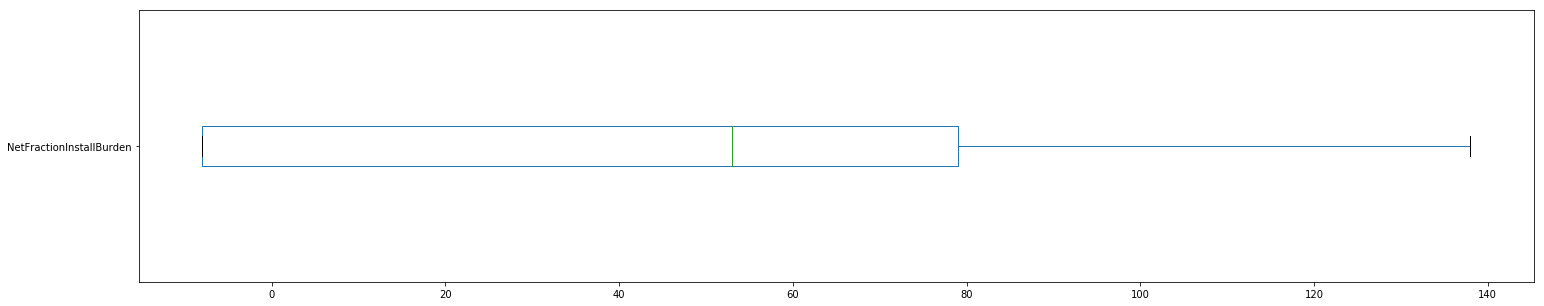

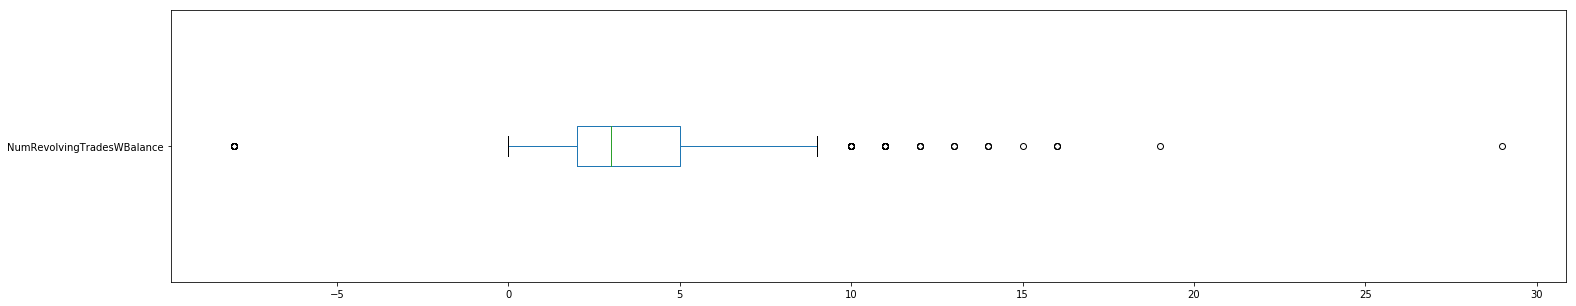

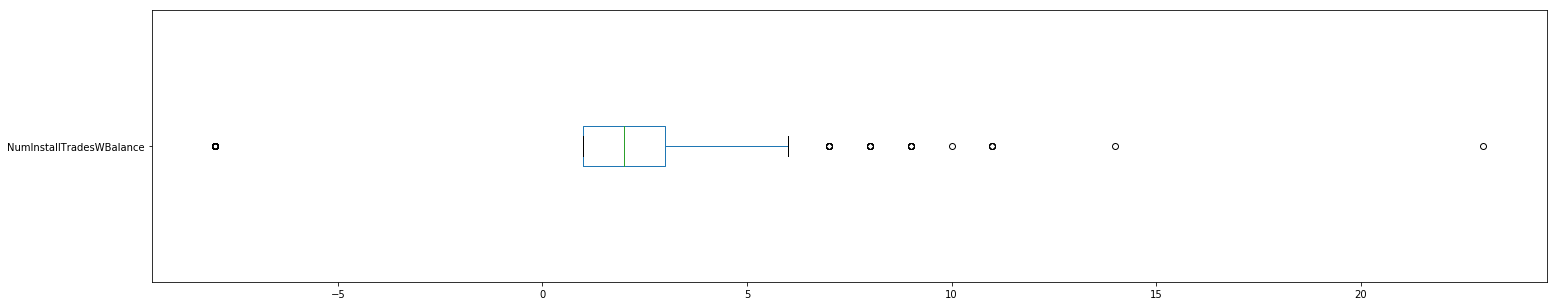

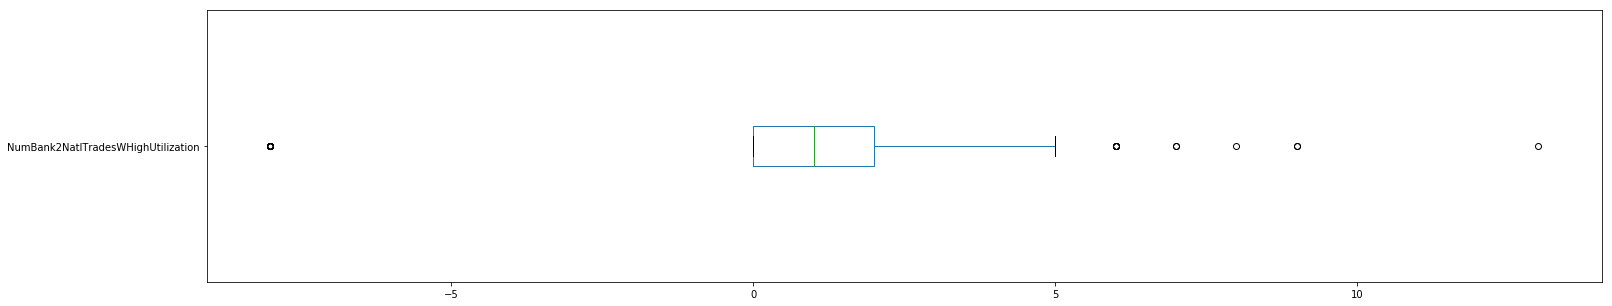

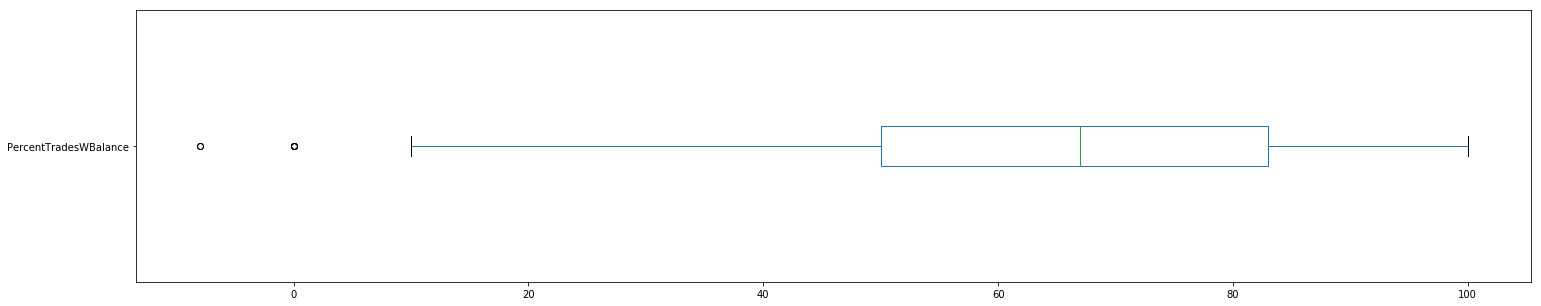

In [27]:
boxplots = PdfPages('continuous_boxplots.pdf')

for column in continuous_columns:
    figure = df[column].plot(kind='box', figsize=(25,5), vert=False)
    boxplots.savefig(figure.get_figure())
    plt.show()

boxplots.close()

Presented below are bar plots representing the distribution of values in each our of categorical features:

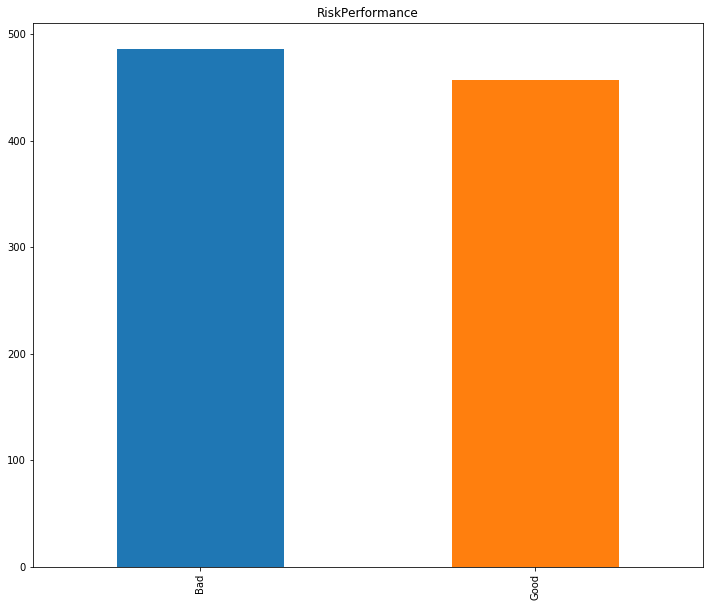

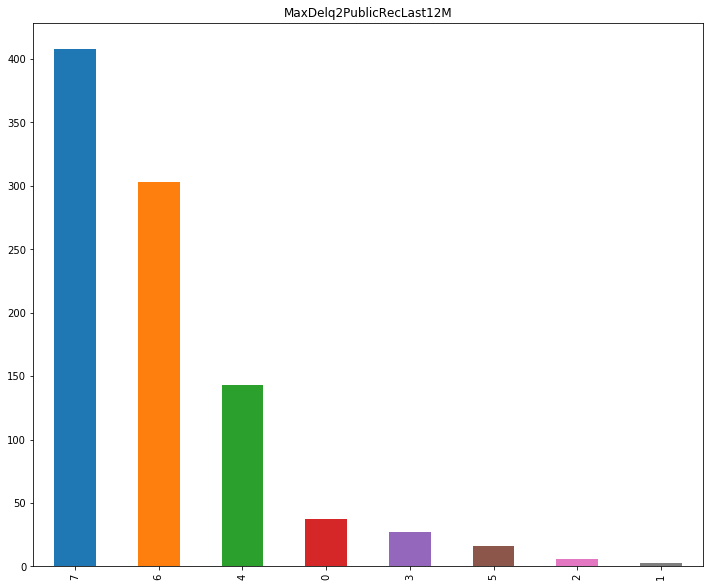

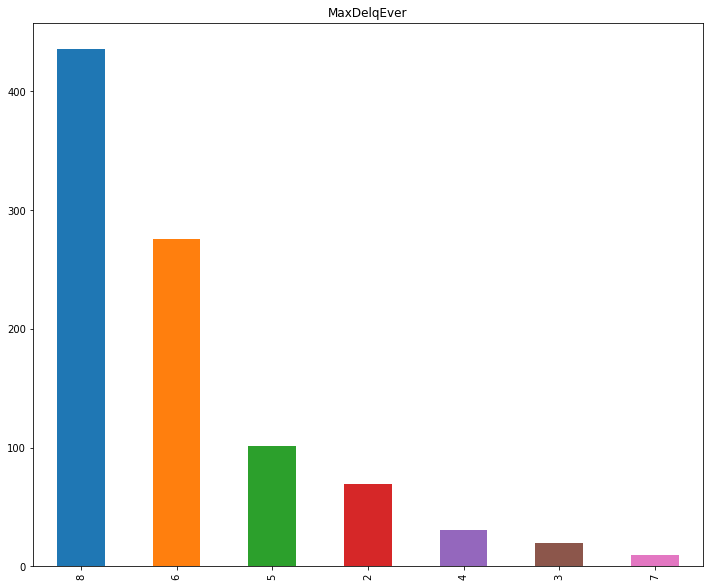

In [28]:
barcharts = PdfPages('categorical_barcharts.pdf')

for column in categorical_columns:
    figure = df[column].value_counts().plot(kind='bar', title=column, figsize=(12,10))
    barcharts.savefig(figure.get_figure())
    plt.show()

barcharts.close()

See **"Data Quality Report.pdf"** for a discussion of the findings in this section.

# (2). Data Quality Plan
The initial list of issues as identified in the Data Quality Report are:
- The integers -7, -8 and -9 represent categorical values in the continuous features, making up a significant proportion of some (50% of values in months since most recent delinquency are -7, for example). If interpreted as continuous values, we will come away with absurd and inaccurate conclusions such as it having been a negative number of months since an account met a condition.
- The box plots reveal significant numbers of outliers in many features, some of which are very extreme.
- PercentTradesNeverDelq and MSinceMostRecentDelq seem to contradict eachother in respect to how many accounts have never made a delinquent trade. 
- Max delinquency/public record 12 months and max delinquency use a single value to represent both no delinquent trades and current delinquent trades.


## Standard checks for additional problems

Before exploring solutions to these issues, we will perform some standard checks to attempt to pick up any additional issues:

First we will check our categorical features for irregular cardinality:

In [29]:
print("Unique values for:\n- RiskPerformance:", pd.unique(df.RiskPerformance.ravel()))
print("\n- MaxDelq2PublicRecLast12M:", pd.unique(df.MaxDelq2PublicRecLast12M.ravel()))
print("\n- MaxDelqEver:", pd.unique(df.MaxDelqEver.ravel()))

Unique values for:
- RiskPerformance: ['Bad' 'Good']

- MaxDelq2PublicRecLast12M: [7 0 1 4 6 5 3 2]

- MaxDelqEver: [8 6 2 3 5 7 4]


None of our categorical features have irregular cardinality.

We will now check all our columns for null values:

In [30]:
df.isnull().sum()

RiskPerformance                       0
ExternalRiskEstimate                  0
MSinceOldestTradeOpen                 0
MSinceMostRecentTradeOpen             0
AverageMInFile                        0
NumSatisfactoryTrades                 0
NumTrades60Ever2DerogPubRec           0
NumTrades90Ever2DerogPubRec           0
PercentTradesNeverDelq                0
MSinceMostRecentDelq                  0
MaxDelq2PublicRecLast12M              0
MaxDelqEver                           0
NumTotalTrades                        0
NumTradesOpeninLast12M                0
PercentInstallTrades                  0
MSinceMostRecentInqexcl7days          0
NumInqLast6M                          0
NetFractionRevolvingBurden            0
NetFractionInstallBurden              0
NumRevolvingTradesWBalance            0
NumInstallTradesWBalance              0
NumBank2NatlTradesWHighUtilization    0
PercentTradesWBalance                 0
dtype: int64

None of the features contain null values.

Standard checks have revealed no additional problems, therefore we will now move on to exploring solutions to the problems initially identified with the dataset.

## Solutions for the identified problems

1. **The integers -7, -8 and -9 represent categorical values in the continuous features, making up a significant proportion of some.**

If we were to interpret these negative values as if they were continuous values, we would come away with absurd and false conclusions about the data such a negative number of months having passed since an account met a condition. Simply removing rows containing these values however would lead to a significant loss of data, with these negative values making up a significant proportion of the total values for some features (50% of values in months since most recent delinquency are -7 or below, for example). -8 and -9 seem to effectively represent null values (meaning "No Bureau Record or No Investigation" and "-8 No Usable/Valid Trades or Inquiries", respectively). -7 values contain meaningful data however, representing situations where valid data exists for an account but they did not meet the relevant condition. For example, if an account has a value of -7 for MSinceMostRecentDelq, this tells us that the account has never had a delinquency, which is clearly meaningful and useful information. 

As can be seen from the descriptive statistics table for continous features, no features contain 50% or more of values less than or equal to -8, so it is not immediately apparent that any features will have to be dropped. The imputation of these -8 and -9 values in the continuous features with the nan value from numpy is proposed where these values make up less than 30% of the values in that feature (imputation is not generally recommended where this is this is not the case). Feature with more than 30% but less than 50% -8 or -9 values will be judged individually for suitablilty for imputation.

After imputation is performed on the -8 and -9, binning is proposed for columns containing -7 values, with these values first being temporarily replaced with numpy's inf value so that the highest bin may be reserved for them and appropriately labelled. Equal width binning would be the most appropriate way to define our bins, apart from the last bin in each feature which will go from the upper cut-off of the second highest bin to np.inf, which will allow for the seperation of the non-continous 'condition not met' values from the continuous values. It is recognised that this is an imperfect solution, however, it at least maintains the meaning of the 'condition not met values' while getting around the problem their representation as negative integers, which would have thrown off the accuracy of predictive models trained on this dataset. 

2. **There are a significant number of outliers and some extreme outliers across many features.**

These outliers should be investigated to see if they are justified. If outliers are found to be unjustified, the implmentation of clamping is proposed.

3. **PercentTradesNeverDelq and MSinceMostRecentDelq seem to contradict eachother in respect to how many account have never made a delinquent trade.** 

This issue should be investigated further to verify that there is indeed a contradiction here.

4. **MaxDelq2PublicRecLast12M and MaxDelqEver use a single value to represent both no delinquent trades and current delinquent trades**

We will attempt to determine clear meanings from these ambiguous values by comparing them with their corresponding values in MSinceMostRecentDelq.


### - Application of solutions:

1. **The integers -7, -8 and -9 represent categorical values in the continuous features, making up a significant proportion of some.**

Imputation is only recommended for features missing 30% or less of their data. By examining the descriptive statisitics table for continuous features, we can see that the only one of our continuous features which may contain more than 30% values is NetFractionInstallBurden (minimum value -8):

In [31]:
print("Occurences of -8 in NetFractionInstallBurden:", str(df[df['NetFractionInstallBurden'] == -8].NetFractionInstallBurden.count())+"/944")

Occurences of -8 in NetFractionInstallBurden: 332/944


Roughly 35% of values in NetFractionInstallBurden are -8, therefore it does not seem that imputation would be an appropriate solution for this feature. An alternative solution is to simply drop the feature, however this would also be an inappropriate solution if NetFractionInstallBurden is a strong predictor for our target feature. Therefore, we will now investigate the correlation between this feature and our target feature, RiskPerformance.

In [32]:
#converting RiskPerformance to a dummy variable to measure correlation with NetFractionInstallBurden, reference: https://stackoverflow.com/questions/44694228/how-to-check-for-correlation-among-continuous-and-categorical-variables-in-pytho
dummies = pd.get_dummies(df['RiskPerformance'])
del dummies[dummies.columns[-1]]
temp_df = df
df_with_dummies = pd.concat([temp_df, dummies], axis=1)
df_with_dummies.rename(columns={"Bad": "RiskPerformanceDummy"}, inplace=True)
print(df_with_dummies[['RiskPerformance','RiskPerformanceDummy']].head(5))
del df_with_dummies['RiskPerformance']

  RiskPerformance  RiskPerformanceDummy
0             Bad                     1
1            Good                     0
2             Bad                     1
3             Bad                     1
4            Good                     0


In [33]:
correlation = df_with_dummies['NetFractionInstallBurden'].corr(df_with_dummies['RiskPerformanceDummy'], method='pearson')
print("The standard correlation between NetFractionInstallBurden and a 'Bad' RiskPerformance value is roughly", str(round(correlation, 2)) + ".")

The standard correlation between NetFractionInstallBurden and a 'Bad' RiskPerformance value is roughly 0.16.


While there is a correlation here it, it is quite weak. Therefore, it seems like dropping this feature rather than imputing it would be the lesser of two evils here.

In [34]:
#dropping NetFractionInstallBurden
df = df.drop('NetFractionInstallBurden', axis=1)
#removing it from from continuous_columns
continuous_columns = df[['ExternalRiskEstimate','MSinceOldestTradeOpen','MSinceMostRecentTradeOpen','AverageMInFile','NumSatisfactoryTrades','NumTrades60Ever2DerogPubRec','NumTrades90Ever2DerogPubRec','PercentTradesNeverDelq','MSinceMostRecentDelq','NumTotalTrades','NumTradesOpeninLast12M','PercentInstallTrades','MSinceMostRecentInqexcl7days','NumInqLast6M','NetFractionRevolvingBurden','NumRevolvingTradesWBalance','NumInstallTradesWBalance','NumBank2NatlTradesWHighUtilization','PercentTradesWBalance']].columns

In all other continuous features, we will impute -8 and -9 with numpy's nan value. The only feature containing -9 values is ExternalRiskEstimate. The remaining features containing -8 values are:
   - ExternalRiskEstimate
   - MSinceOldestTradeOpen
   - MSinceMostRecentDelq 
   - MSinceMostRecentInqexcl7days
   - NetFractionRevolvingBurden 
   - NumRevolvingTradesWBalance 
   - NumInstallTradesWBalance  
   - NumBank2NatlTradesWHighUtilization 
   - PercentTradesWBalance

In [35]:
#imputing -8 and -9 with np.nan
df['ExternalRiskEstimate'] = df['ExternalRiskEstimate'].replace(-9, np.nan)
df['ExternalRiskEstimate'] = df['ExternalRiskEstimate'].replace(-8, np.nan)
df['MSinceOldestTradeOpen'] = df['MSinceOldestTradeOpen'].replace(-8, np.nan)
df['MSinceMostRecentDelq'] = df['MSinceMostRecentDelq'].replace(-8, np.nan)
df['MSinceMostRecentInqexcl7days'] = df['MSinceMostRecentInqexcl7days'].replace(-8, np.nan)
df['NetFractionRevolvingBurden'] = df['NetFractionRevolvingBurden'].replace(-8, np.nan)
df['NumRevolvingTradesWBalance'] = df['NumRevolvingTradesWBalance'].replace(-8, np.nan)
df['NumInstallTradesWBalance'] = df['NumInstallTradesWBalance'].replace(-8, np.nan)
df['NumBank2NatlTradesWHighUtilization'] = df['NumBank2NatlTradesWHighUtilization'].replace(-8, np.nan)
df['PercentTradesWBalance'] = df['PercentTradesWBalance'].replace(-8, np.nan)

Now that all -8 and -9 values have been imputed, we can move on to the the issue of -7 values. We will now check which continuous features with a min of -7 or less as displayed on the descriptive statistics table contain -7 values:  

In [36]:
#checking which of the continuous features with negative means contain -7 values
print((df['ExternalRiskEstimate'] == -7).value_counts())
print()
print((df['MSinceOldestTradeOpen'] == -7).value_counts())
print()
print((df['MSinceMostRecentDelq'] == -7).value_counts())
print()
print((df['MSinceMostRecentInqexcl7days'] == -7).value_counts())
print()
print((df['NetFractionRevolvingBurden'] == -7).value_counts())
print()
print((df['NumRevolvingTradesWBalance'] == -7).value_counts())
print()
print((df['NumInstallTradesWBalance'] == -7).value_counts())
print()
print((df['NumBank2NatlTradesWHighUtilization'] == -7).value_counts())
print()
print((df['PercentTradesWBalance'] == -7).value_counts())

False    943
Name: ExternalRiskEstimate, dtype: int64

False    943
Name: MSinceOldestTradeOpen, dtype: int64

False    497
True     446
Name: MSinceMostRecentDelq, dtype: int64

False    771
True     172
Name: MSinceMostRecentInqexcl7days, dtype: int64

False    943
Name: NetFractionRevolvingBurden, dtype: int64

False    943
Name: NumRevolvingTradesWBalance, dtype: int64

False    943
Name: NumInstallTradesWBalance, dtype: int64

False    943
Name: NumBank2NatlTradesWHighUtilization, dtype: int64

False    943
Name: PercentTradesWBalance, dtype: int64


Above we can see that only MSinceMostRecentDelq and MSinceMostRecentInqexcl7days contain -7 values. We will first impute -7 in these two features with numpy's inf value.

In [37]:
#imputing -7 with np.inf
df['MSinceMostRecentDelq'] = df['MSinceMostRecentDelq'].replace(-7, np.inf)
df['MSinceMostRecentInqexcl7days'] = df['MSinceMostRecentInqexcl7days'].replace(-7, np.inf)

Now that -7 has been imputed with np.inf for MSinceMostRecentDelq and MSinceMostRecentInqexcl7days, we will bin both of these features.

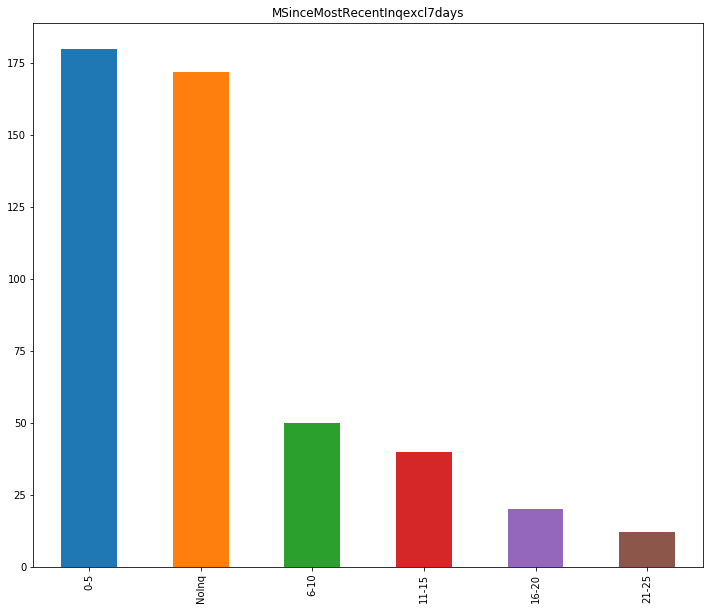

In [38]:
df['MSinceMostRecentInqexcl7days'] = pd.cut(df['MSinceMostRecentInqexcl7days'], bins=[0, 5, 10, 15, 20, 25, np.inf], labels=["0-5", "6-10", "11-15", "16-20", "21-25", "NoInq"])
figure = df['MSinceMostRecentInqexcl7days'].value_counts().plot(kind='bar', title='MSinceMostRecentInqexcl7days', figsize=(12,10))
plt.show()

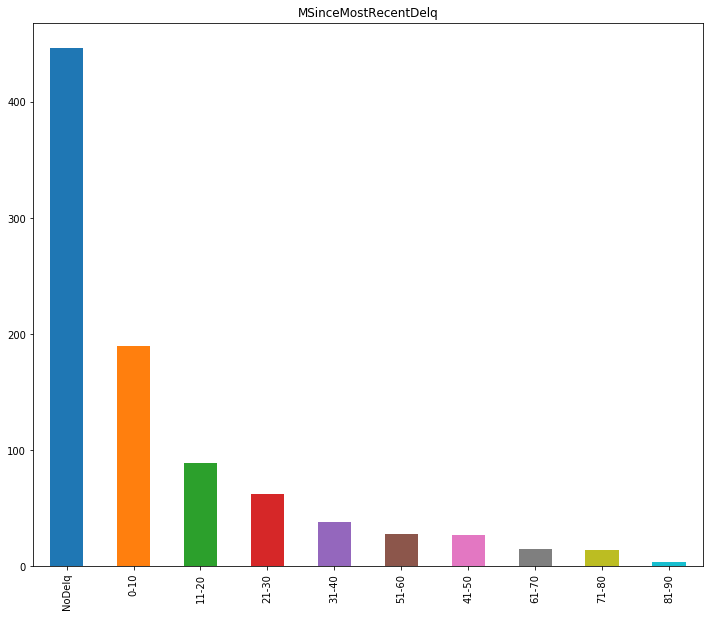

In [39]:
df['MSinceMostRecentDelq'] = pd.cut(df['MSinceMostRecentDelq'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, np.inf], labels=["0-10", "11-20", "21-30", "31-40", "41-50", "51-60", "61-70", "71-80", "81-90", "NoDelq"])

figure = df['MSinceMostRecentDelq'].value_counts().plot(kind='bar', title='MSinceMostRecentDelq', figsize=(12,10))
plt.show()

As we have now binned these features, we will change their data type to categorical and move them to the categorical_columns list.

In [40]:
df['MSinceMostRecentDelq'] = df['MSinceMostRecentDelq'].astype('category')
df['MSinceMostRecentInqexcl7days'] = df['MSinceMostRecentInqexcl7days'].astype('category')

continuous_columns = df[['ExternalRiskEstimate','MSinceOldestTradeOpen','MSinceMostRecentTradeOpen','AverageMInFile','NumSatisfactoryTrades','NumTrades60Ever2DerogPubRec','NumTrades90Ever2DerogPubRec','PercentTradesNeverDelq','NumTotalTrades','NumTradesOpeninLast12M','PercentInstallTrades','NumInqLast6M','NetFractionRevolvingBurden','NumRevolvingTradesWBalance','NumInstallTradesWBalance','NumBank2NatlTradesWHighUtilization','PercentTradesWBalance']].columns
categorical_columns = df[['MSinceMostRecentDelq','MSinceMostRecentInqexcl7days','RiskPerformance','MaxDelq2PublicRecLast12M','MaxDelqEver', 'MSinceMostRecentInqexcl7days', 'MSinceMostRecentDelq']].columns

2. **There are a significant number of outliers and some extreme outliers across many features.**

The features from this dataset with outliers are:
- ExternalRiskEstimate
- MSinceOldestTradeOpen
- MSinceMostRecentTradeOpen
- AverageMInFile
- NumSatisfactoryTrades
- NumTrades60Ever2DerogPubRec
- NumTrades90Ever2DerogPubRec
- PercentTradesNeverDelq
- MSinceMostRecentDelq
- NumTotalTrades
- NumTradesOpeninLast12M
- PercentInstallTrades
- NumInqLast6M
- NumRevolvingTradesWBalance
- NumInstallTradesWBalance
- NumBank2NatlTradesWHighUtilization
- PercentTradesWBalance

While there are too many features with outliers to investigate all of them individually, below we will compare outliers from some groups of related features to evaluate their consistency.

#### MSinceMostRecentTradeOpen and NumTradesOpeninLast12M:

In [41]:
df.sort_values(by='MSinceMostRecentTradeOpen', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last')[['MSinceMostRecentTradeOpen', 'NumTradesOpeninLast12M']].head(34)

,MSinceMostRecentTradeOpen,NumTradesOpeninLast12M
176,184,0
512,143,0
879,112,0
244,84,0
45,80,0
36,79,0
454,76,0
439,75,0
974,70,0
764,70,0


MSinceMostRecentTradeOpen contains both one of the largest amounts of outliers and some of the most extreme outliers of all of these features. However, all of it's outliers are consistent with NumTradesOpeninLast12M insofar as the latter is never greater than 0 (which would require that MSinceMostRecentTradeOpen instead have a value of 0 to be consistent). There does not seem to be anything to indicate that the outliers in these feature are erroneous. 

#### MSinceOldestTradeOpen, NumSatisfactoryTrades and NumTotalTrades

In [42]:
df.sort_values(by='MSinceOldestTradeOpen', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last')[['MSinceOldestTradeOpen','NumSatisfactoryTrades', 'NumTotalTrades']].head(15)

,MSinceOldestTradeOpen,NumSatisfactoryTrades,NumTotalTrades
710,590.0,29,31
564,565.0,24,24
471,541.0,21,23
640,530.0,17,17
432,528.0,10,11
798,515.0,15,15
690,501.0,11,11
594,489.0,29,27
208,474.0,8,15
390,474.0,8,8


The outliers in MSinceOldestTradeOpen are somewhat consistent with NumTotalTrades and NumSatisfactoryTrades, which suggests that they are probably not errors, as it would be expected that the older an account is the more trades it would have in it's history (and to a lesser extent, the more satisfactory trades).

####  NumInqLast6M and MSinceMostRecentInqexcl7days

Note: While MSinceMostRecentInqexcl7days intially contained many outliers, these have been lost through the feature being binned. However, we can still use it to check the consistency of the outliers in NumInqLast6M.

In [43]:
df.sort_values(by='NumInqLast6M', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last')[['NumInqLast6M', 'MSinceMostRecentInqexcl7days']].head(11)

,NumInqLast6M,MSinceMostRecentInqexcl7days
712,66,NaN
195,24,NoInq
399,16,NoInq
647,13,0-5
155,13,NaN
504,12,NaN
894,11,0-5
283,11,NaN
904,11,NaN
294,10,0-5


Comparing the outliers of NumInqLast6M with their corresponding values in MSinceMostRecentInqexcl7days reveals many inconsistencies. In order for the data to be consistent, where NumInqLast6M is postitive, MSinceMostRecentInqexcl7days cannot be NoInq. This suggests that either MSinceMostRecentInqexcl7days erroneously contains NoInq (originally -7/condition not met) values where an account has had an inquiry or NumInqLast6M contains erroneous positive values where it should contains 0s (or a combination of both). Unfortunately, as it cannot confidently be stated which, if any, of these features is accurate, all that can be done for the moment is to take note of this contradiction in the data.     

####  NumTrades60Ever2DerogPubRec and NumTrades90Ever2DerogPubRec

In [44]:
df.sort_values(by='NumTrades60Ever2DerogPubRec', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last')[['NumTrades60Ever2DerogPubRec', 'NumTrades90Ever2DerogPubRec']].head(8)

,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec
280,12,12
962,11,11
506,11,7
369,9,6
523,7,7
462,7,0
58,7,7
434,7,2


The outliers in NumTrades60Ever2DerogPubRec are relatively consistent with and never lower than their correspoding values in NumTrades90Ever2DerogPubRec. Therefore, the outliers in this feature are likely not erroneous. 

####  MSinceMostRecentDelq and PercentTradesNeverDelq

In [45]:
df.sort_values(by='MSinceMostRecentDelq', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last')[['MSinceMostRecentDelq', 'PercentTradesNeverDelq']].head(29)

,MSinceMostRecentDelq,PercentTradesNeverDelq
999,NoDelq,100
433,NoDelq,100
449,NoDelq,100
448,NoDelq,100
447,NoDelq,100
445,NoDelq,100
439,NoDelq,100
437,NoDelq,100
436,NoDelq,100
432,NoDelq,100


The outliers in MSinceMostRecentDelq are completely consistent with PercentTradesNeverDelq, indicating that these outliers are very likely to accurately represent real accounts and should be retained.

Due to the high proportion of features containing outliers, it is difficult to provide a comprehensive assessment of which features outliers should have outliers retained or removed through clamping. However, aside from NumInqLast6M, all of the features investigated above show consistency and there seems to be little to indicate that their outliers are the result of error. As predictive models will encounter outliers in the real world, accurate outliers should not be artificially removed from the training data. Therefore, in the interest of caution, all outliers will be retained.    

3. **PercentTradesNeverDelq and MSinceMostRecentDelq seem to contradict eachother in respect to how many accounts have never made a delinquent trade.**

Let us begin our investigation by examining the values of these features in some individual rows.

Firstly, we will check if there are any rows where PercentTradesNeverDelq is 100% but MSinceMostRecentDelq is not 'NoDelq', which would constitute a contradiction.

In [46]:
df[df['PercentTradesNeverDelq'] == 100][df['MSinceMostRecentDelq'] != 'NoDelq'][['PercentTradesNeverDelq','MSinceMostRecentDelq']]

,PercentTradesNeverDelq,MSinceMostRecentDelq


This check returned no rows, so we will now check for rows where where PercentTradesNeverDelq is not 100% but MSinceMostRecentDelq is 'NoDelq', another contradictory combination.

In [47]:
df[df['PercentTradesNeverDelq'] != 100][df['MSinceMostRecentDelq'] == 'NoDelq'][['PercentTradesNeverDelq','MSinceMostRecentDelq']]

,PercentTradesNeverDelq,MSinceMostRecentDelq
21,96,NoDelq
558,96,NoDelq
829,90,NoDelq


These three returned rows must be the source of the statistical contradiction displayed on our table. As with the inconsistent rows for NumInqLast6M and MSinceMostRecentInqexcl7days, we cannot confidently say which feature is accurate for each contradictory row. Therefore, we will acknowledge this issue but leave the features as they are. Fortunately as it is only three rows it shouldn't throw off a predictive model trained on our data to any significant degree. 

4. **MaxDelq2PublicRecLast12M and MaxDelqEver use a single value to represent both no delinquent trades and current delinquent trades**

We will attempt to determine clear meanings from these ambiguous values by comparing them with their corresponding values in MSinceMostRecentDelq.

First, we will check how often a current/never delinquent value in MaxDelq2PublicRecLast12M and MaxDelqEver corresponds to a 'NoDelq' versus a positive (at least one delinquency) value in MSinceMostRecentDelq:

In [48]:
print("Current/never delinquent values in MaxDelq2PublicRecLast12M:")
print()
print(df[df['MaxDelqEver'] == 8][['MaxDelqEver']].count())
print()
print()
print("Of which the corresponding value in MaxDelq2PublicRecLast12M is NoDelq:")
print()
print(df[df['MaxDelqEver'] == 8][df['MSinceMostRecentDelq'] == 'NoDelq'][['MaxDelqEver']].count())

Current/never delinquent values in MaxDelq2PublicRecLast12M:

MaxDelqEver    436
dtype: int64


Of which the corresponding value in MaxDelq2PublicRecLast12M is NoDelq:

MaxDelqEver    436
dtype: int64


In [49]:
print("Current/never delinquent values in MaxDelqEver:")
print()
print(df[df['MaxDelq2PublicRecLast12M'] == 7][['MaxDelqEver']].count())
print()
print()
print("Of which the corresponding value in MSinceMostRecentDelq is NoDelq:")
print()
print(df[df['MaxDelq2PublicRecLast12M'] == 7][df['MSinceMostRecentDelq'] == 'NoDelq'][['MaxDelq2PublicRecLast12M']].count())

Current/never delinquent values in MaxDelqEver:

MaxDelqEver    408
dtype: int64


Of which the corresponding value in MSinceMostRecentDelq is NoDelq:

MaxDelq2PublicRecLast12M    408
dtype: int64


As can be seen above, all current/never delinquent values in MaxDelqEver and MaxDelq2PublicRecLast12M (8 and 7 respectively) correspond to NoDelq values in MSinceMostRecentDelq (although as shown in solution 3 there are 3 NoDelq values in MSinceMostRecentDelq which may be errors, but even if this is true these only represent a negligable approximately 0.7% of current/never delinquent values).
     

Therefore, these is no need to create seperate values in MaxDelqEver and MaxDelq2PublicRecLast12M to represent current deliquent accounts and never delinquent accounts, as the 8/7 value is seemingly only used to represent never delinquent accounts.

It is however recommended the the meaning ascribed to the 8/7 value for MaxDelqEver and MaxDelq2PublicRecLast12M in the data dictionary be changed to simply "never delinquent rather than "current and never delinquent" for the sake of clarity.

1. **The integers -7, -8 and -9 represent categorical values in the continuous features, making up a significant proportion of some.**

If we were to interpret these negative values as if they were continuous values, we would come away with absurd and false conclusions about the data such a negative number of months having passed since an account met a condition. Simply removing rows containing these values however would lead to a significant loss of data, with these negative values making up a significant proportion of the total values for some features (50% of values in months since most recent delinquency are -7 or below, for example). -8 and -9 seem to effectively represent null values (meaning "No Bureau Record or No Investigation" and "-8 No Usable/Valid Trades or Inquiries", respectively). -7 values contain meaningful data however, representing situations where valid data exists for an account but they did not meet the relevant condition. For example, if an account has a value of -7 for MSinceMostRecentDelq, this tells us that the account has never had a delinquency, which is clearly meaningful and useful information. 

As can be seen from the descriptive statistics table for continous features, no features contain 50% or more of values less than or equal to -8, so it is not immediately apparent that any features will have to be dropped. The imputation of these -8 and -9 values in the continuous features with the nan value from numpy is proposed where these values make up less than 30% of the values in that feature (imputation is not generally recommended where this is this is not the case). Feature with more than 30% but less than 50% -8 or -9 values will be judged individually for suitablilty for imputation.

After imputation is performed on the -8 and -9, binning is proposed for columns containing -7 values, with these values first being temporarily replaced with numpy's inf value so that the highest bin may be reserved for them and appropriately labelled. Equal width binning would be the most appropriate way to define our bins, apart from the last bin in each feature which will go from the upper cut-off of the second highest bin to np.inf, which will allow for the seperation of the non-continous 'condition not met' values from the continuous values. It is recognised that this is an imperfect solution, however, it at least maintains the meaning of the 'condition not met values' while getting around the problem their representation as negative integers, which would have thrown off the accuracy of predictive models trained on this dataset. 

2. **There are a significant number of outliers and some extreme outliers across many features.**

These outliers should be investigated to see if they are justified. If outliers are found to be unjustified, the implmentation of clamping is proposed.

3. **PercentTradesNeverDelq and MSinceMostRecentDelq seem to contradict eachother in respect to how many account have never made a delinquent trade.** 

This issue should be investigated further to verify that there is indeed a contradiction here.

4. **MaxDelq2PublicRecLast12M and MaxDelqEver use a single value to represent both no delinquent trades and current delinquent trades**

We will attempt to determine clear meanings from these ambiguous values by comparing them with their corresponding values in MSinceMostRecentDelq.


### Summary of data quality plan:
   
| Feature                 | Data Quality Issue   | Handling Strategy            |
|-------------------------|----------------------|------------------------------|
| NetFractionInstallBurden | >30% N/A values | Feature dropped |
| ExternalRiskEstimate | N/A values (<30%) | Imputation |
| MSinceOldestTradeOpen | N/A values (<30%) | Imputation |
| MSinceMostRecentDelq | N/A values (<30%) | Imputation |
| MSinceMostRecentInqexcl7days | N/A values (<30%) | Imputation |
| NetFractionRevolvingBurden | N/A values (<30%) | Imputation |
| NumRevolvingTradesWBalance | N/A values (<30%) | Imputation |
| NumInstallTradesWBalance | N/A values (<30%) | Imputation |
| NumBank2NatlTradesWHighUtilization | N/A values (<30%) | Imputation |
| PercentTradesWBalance | N/A values (<30% | Imputation |
| MSinceMostRecentDelq | -7 values | Imputation then binning |
| MSinceMostRecentInqexcl7days | -7 values | Imputation then binning |
| ExternalRiskEstimate | Outliers | Do nothing |
| MSinceOldestTradeOpen | Outliers | Do nothing |
| MSinceMostRecentTradeOpen | Outliers | Do nothing |
| AverageMInFile | Outliers | Do nothing |
| NumSatisfactoryTrades | Outliers | Do nothing |
| NumTrades60Ever2DerogPubRec | Outliers | Do nothing |
| NumTrades90Ever2DerogPubRec | Outliers | Do nothing |
| PercentTradesNeverDelq | Outliers | Do nothing |
| MSinceMostRecentDelq | Outliers | Do nothing |
| NumTotalTrades | Outliers | Do nothing |
| NumTradesOpeninLast12M | Outliers | Do nothing |
| PercentInstallTrades | Outliers | Do nothing |
| NumInqLast6M | Outliers | Do nothing |
| NumRevolvingTradesWBalance | Outliers | Do nothing |
| NumInstallTradesWBalance | Outliers | Do nothing |
| NumBank2NatlTradesWHighUtilization | Outliers | Do nothing |
| PercentTradesWBalance | Outliers | Do nothing |
| NumInqLast6M | Inconsistency | Do nothing |
| MSinceMostRecentInqexcl7days | Inconsistency | Do nothing |
| PercentTradesNeverDelq | Inconsistency | Do nothing |
| MSinceMostRecentDelq | Inconsistency | Do nothing |
| MaxDelq2PublicRecLast12M | Ambiguous value meaning | Meaning clarified |
| MaxDelqEver | Ambiguous value meaning | Meaning clarified |

Our updated table of descriptive statistics for continuous features:

In [50]:
df.select_dtypes(['float64', 'int64']).describe().T

,count,mean,std,min,25%,50%,75%,max
ExternalRiskEstimate,941.0,71.989373,9.797627,40.0,65.0,72.0,80.0,92.0
MSinceOldestTradeOpen,923.0,200.458288,97.507601,7.0,132.0,185.0,254.5,590.0
MSinceMostRecentTradeOpen,943.0,9.667020,13.337026,0.0,3.0,6.0,12.0,184.0
AverageMInFile,943.0,79.463415,36.269141,7.0,57.0,75.0,96.0,258.0
NumSatisfactoryTrades,943.0,20.923648,11.026435,1.0,13.0,20.0,27.0,74.0
NumTrades60Ever2DerogPubRec,943.0,0.617179,1.306850,0.0,0.0,0.0,1.0,12.0
NumTrades90Ever2DerogPubRec,943.0,0.379639,1.009556,0.0,0.0,0.0,0.0,12.0
PercentTradesNeverDelq,943.0,92.217391,11.887317,20.0,88.5,97.0,100.0,100.0
NumTotalTrades,943.0,22.686108,12.637905,0.0,14.0,21.0,29.0,78.0
NumTradesOpeninLast12M,943.0,1.889714,1.891014,0.0,0.0,1.0,3.0,17.0


Our updated table of descriptive statistics for categorical features:

In [51]:
df.select_dtypes(['category']).describe().T

,count,unique,top,freq
RiskPerformance,943,2,Bad,486
MSinceMostRecentDelq,913,10,NoDelq,446
MaxDelq2PublicRecLast12M,943,8,7,408
MaxDelqEver,943,7,8,436
MSinceMostRecentInqexcl7days,474,6,0-5,180


We will now save our post data quality plan dataframe to a CSV.

In [52]:
df.to_csv('PostDataQualityPlan.csv', index=False)

# (3). Exploring relationships between feature pairs

### Continuous Features

The continuous features that we will examine for pairwise feature interaction are the following:
  - MSinceOldestTradeOpen
  - AverageMInFile
  - NumSatisfactoryTrades
  - PercentTradesNeverDelq
  - NumTotalTrades
  - NumTradesOpeninLast12M

These choices are based on the assumptions that:

- The older an account is (MSinceOldestTradeOpen, AverageMInFile), the more trades (NumTotalTrades) and to a lesser extent satisfactory trades (NumSatisfactoryTrades) they will have made.

- Accounts with a high number of trades in the last 12 months (NumTradesOpeninLast12M) are more likely to have a history of frequently trading (NumTotalTrades).

- Accounts with more satisfactory trades (NumSatisfactoryTrades) are more likely to have a higher percentage of never delinquent trades (PercentTradesNeverDelq).

We will now investigate the correlation between these features using a correlation heatmap:

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]), <a list of 6 Text xticklabel objects>)

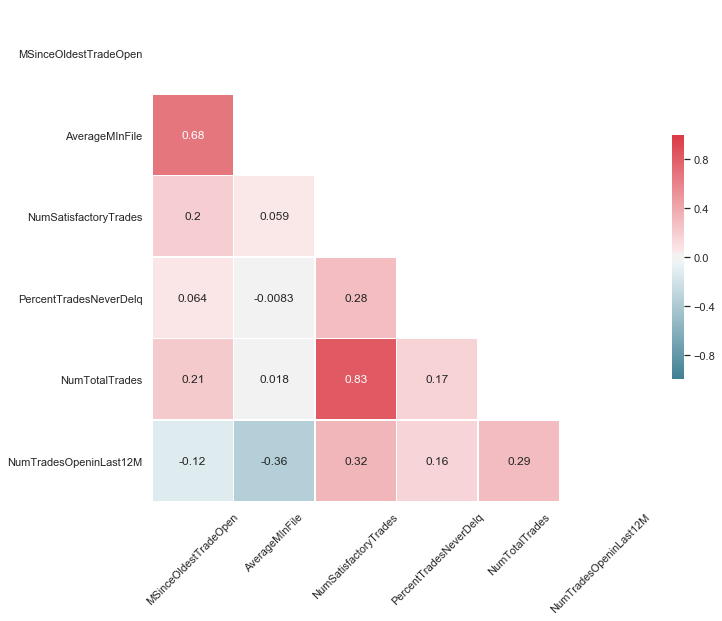

In [53]:
# Correlation matrix using code found on https://stanford.edu/~mwaskom/software/seaborn/examples/many_pairwise_correlations.html
sns.set(style="white")

# Putting the continuous features for which correlation is being investigated together:
investigated_continuous = df[['MSinceOldestTradeOpen','AverageMInFile','NumSatisfactoryTrades','PercentTradesNeverDelq','NumTotalTrades','NumTradesOpeninLast12M']].columns

# Calculate correlation of all pairs of continuous features
corr = df[investigated_continuous].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom colormap - blue and red
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=1, vmin=-1,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.yticks(rotation = 0)
plt.xticks(rotation = 45)

We can see from our heapmap that MSinceOldestTradeOpen and AverageMInFile are strongly correlated, as are NumSatisfactoryTrades and NumTotalTrades.

We can also see weak correlations between MSinceOldestTradeOpen & NumSatisfactoryTrades, MSinceOldestTradeOpen & NumTotalTrades, NumSatisfactoryTrades & PercentTradesNeverDelq, NumSatisfactoryTrades & NumTradesOpeninLast12M and finally NumTotalTrades & NumTradesOpeninLast12M.    

We will now plot scatterplots for feature pairs with correlation of at least 0.2 to examine if these correlations are linear or otherwise:

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

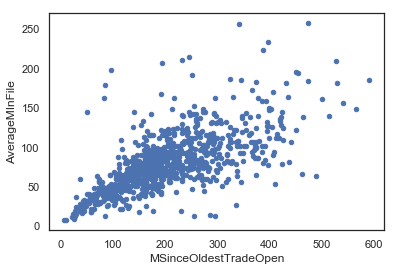

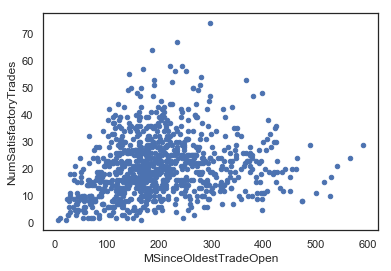

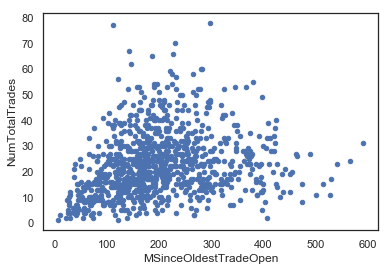

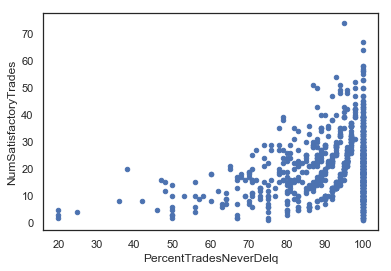

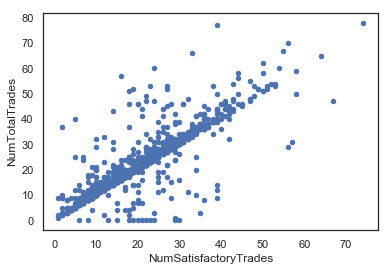

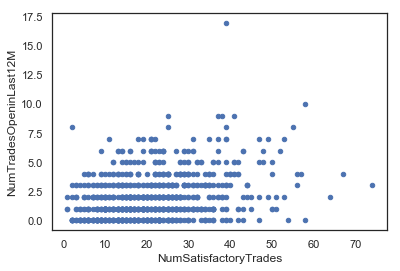

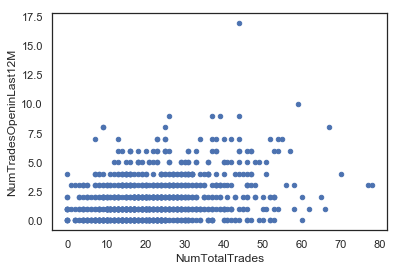

In [54]:
df.plot(kind='scatter', x='MSinceOldestTradeOpen', y='AverageMInFile')
df.plot(kind='scatter', x='MSinceOldestTradeOpen', y='NumSatisfactoryTrades')
df.plot(kind='scatter', x='MSinceOldestTradeOpen', y='NumTotalTrades')
df.plot(kind='scatter', x='PercentTradesNeverDelq', y='NumSatisfactoryTrades')
df.plot(kind='scatter', x='NumSatisfactoryTrades', y='NumTotalTrades')
df.plot(kind='scatter', x='NumSatisfactoryTrades', y='NumTradesOpeninLast12M')
df.plot(kind='scatter', x='NumTotalTrades', y='NumTradesOpeninLast12M')

For the features with a strong correlation (MSinceOldestTradeOpen & AverageMInFile and NumSatisfactoryTrades & NumTotalTrades), the plots show us that these correlations are quite linear, particularly for NumSatisfactoryTrades & NumTotalTrades in which most of the markers forming a straight line. 

For the features with weak correlation, NumSatisfactoryTrades & MSinceOldestTradeOpen and NumTotalTrades & MSinceOldestTradeOpen seem to be somewhat linearly correlated, NumTradesOpeninLast12M seems to usually stop at 7.5 while NumTotalTrades and NumSatisfactoryTrades continues to rise and the relationship between NumSatisfactoryTrades and PercentTradesNeverDelq seems to be exponential bar the presence of a with a vertical line hovering above 0 on the y-axis at 100 on the x-xis (indicating that a fairly consistent proportion of accounts have had no delinquent trades for the most of the range of positive numbers of satisfactory trades).

### Categorical Features

The categorical features that will be examined for correlation with our target feature RiskPerformance are:
  - MSinceMostRecentDelq
  - MaxDelq2PublicRecLast12M
  - MaxDelqEver

These features have been chosen on the assumption that the frequency (MSinceMostRecentDelq) and severity (MaxDelqEver and MaxDelq2PublicRecLast12M) of an account's delinquent trades is a signficant predictor of RiskPerformance.

We will now plot stacked barcharts of each of these features with RiskPerformance to examine the distribution of 'Bad' and 'Good' values across the different values in each feature.

(0, 100)

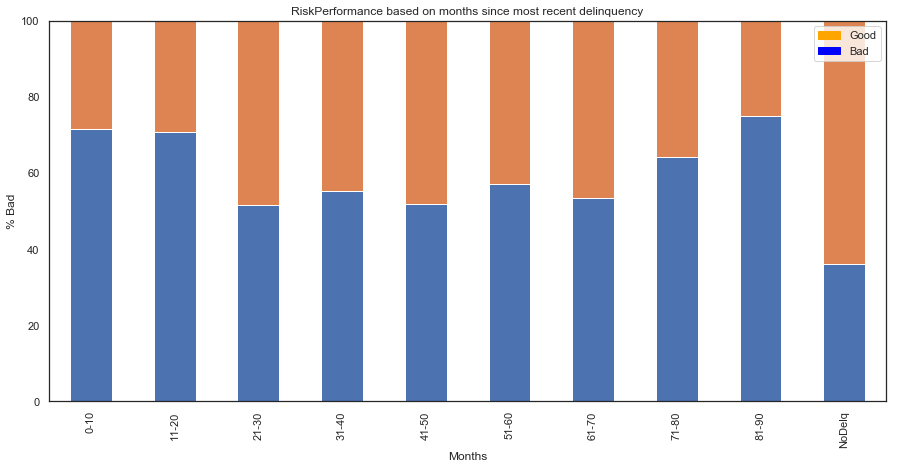

In [55]:
MSinceMostRecentDelq = pd.unique(df.MSinceMostRecentDelq.ravel())

df['percent'] = 0

for i in MSinceMostRecentDelq:
    count = 1 / df[df.MSinceMostRecentDelq == i].count()['RiskPerformance']
    index_list = df[df['MSinceMostRecentDelq'] == i].index.tolist()
    for ind in index_list:
        df.loc[ind, 'percent'] = count * 100
        
group = df[['percent','RiskPerformance','MSinceMostRecentDelq']].groupby(['MSinceMostRecentDelq','RiskPerformance']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="RiskPerformance based on months since most recent delinquency", figsize=(15,7))

orange_patch = mpatches.Patch(color='orange', label='Good')
blue_patch = mpatches.Patch(color='blue', label='Bad')
my_plot.legend(handles=[orange_patch, blue_patch], frameon = True)

my_plot.set_xlabel("Months")
my_plot.set_ylabel("% Bad")
my_plot.set_ylim([0,100])

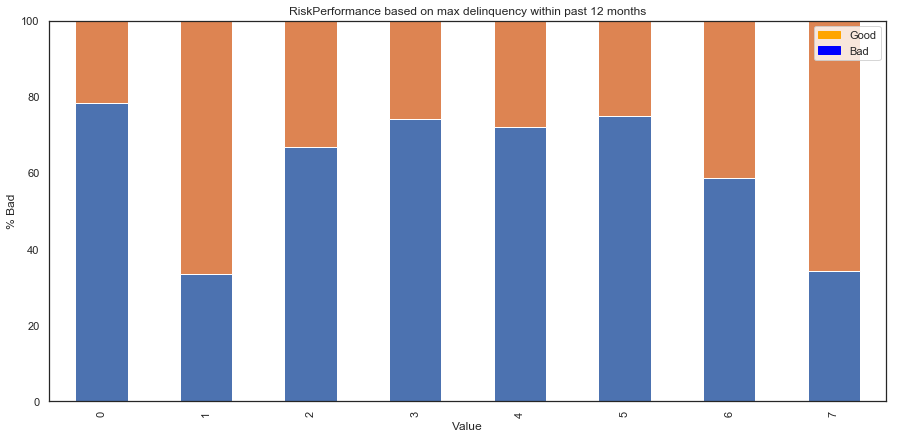

In [56]:
MaxDelq2PublicRecLast12M = pd.unique(df.MaxDelq2PublicRecLast12M.ravel())

df['percent'] = 0

for i in MaxDelq2PublicRecLast12M:
    count = 1 / df[df.MaxDelq2PublicRecLast12M == i].count()['RiskPerformance']
    index_list = df[df['MaxDelq2PublicRecLast12M'] == i].index.tolist()
    for ind in index_list:
        df.loc[ind, 'percent'] = count * 100
        
group = df[['percent','RiskPerformance','MaxDelq2PublicRecLast12M']].groupby(['MaxDelq2PublicRecLast12M','RiskPerformance']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="RiskPerformance based on max delinquency within past 12 months", figsize=(15,7))

orange_patch = mpatches.Patch(color='orange', label='Good')
blue_patch = mpatches.Patch(color='blue', label='Bad')
my_plot.legend(handles=[orange_patch, blue_patch], frameon = True)

my_plot.set_xlabel("Value")
my_plot.set_ylabel("% Bad")
my_plot.set_ylim([0,100])

del df['percent']

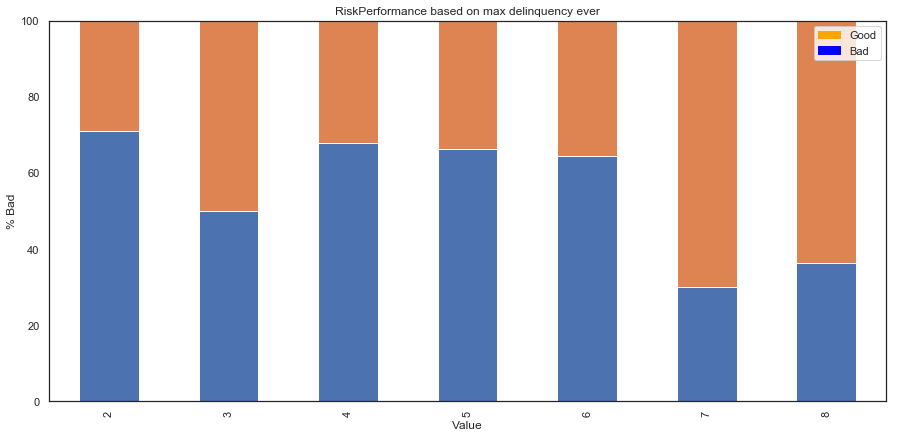

In [57]:
MaxDelqEver = pd.unique(df.MaxDelqEver.ravel())

df['percent'] = 0

for i in MaxDelqEver:
    count = 1 / df[df.MaxDelqEver == i].count()['RiskPerformance']
    index_list = df[df['MaxDelqEver'] == i].index.tolist()
    for ind in index_list:
        df.loc[ind, 'percent'] = count * 100
        
group = df[['percent','RiskPerformance','MaxDelqEver']].groupby(['MaxDelqEver','RiskPerformance']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="RiskPerformance based on max delinquency ever", figsize=(15,7))

orange_patch = mpatches.Patch(color='orange', label='Good')
blue_patch = mpatches.Patch(color='blue', label='Bad')
my_plot.legend(handles=[orange_patch, blue_patch], frameon = True)

my_plot.set_xlabel("Value")
my_plot.set_ylabel("% Bad")
my_plot.set_ylim([0,100])

del df['percent']

Our stacked bar charts don't provide any useful insight into the relationships between these features, as there doesn't seem to be any discernable pattern in respect to the distribution of 'Good' and 'Bad' values across the values of our other categorical features.

### Continuous-categorical feature plots

We will now investigate the interactions between the following of our continuous features and our target feature RiskPerformance:
- MSinceOldestTradeOpen
- AverageMInFile
- NumSatisfactoryTrades
- PercentTradesNeverDelq
- NumTotalTrades
- NumTradesOpeninLast12M

First, we will investigate these interactions through the box plot collection approach.

<Figure size 432x288 with 0 Axes>

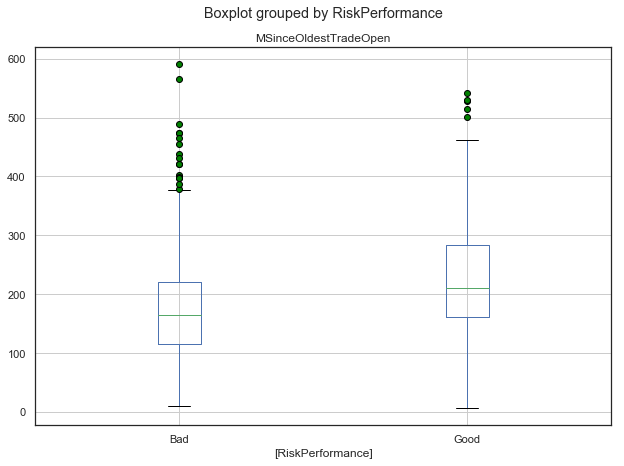

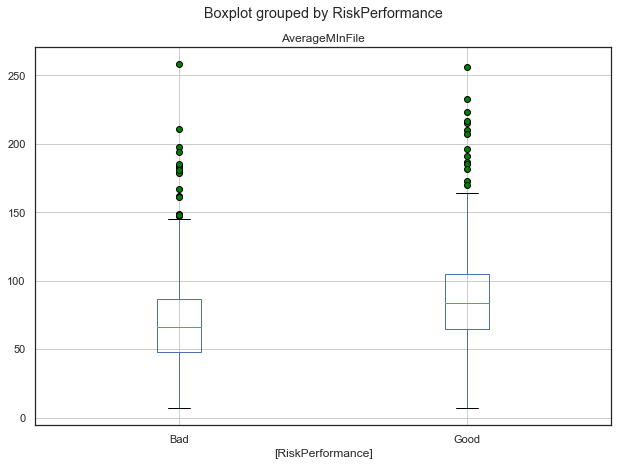

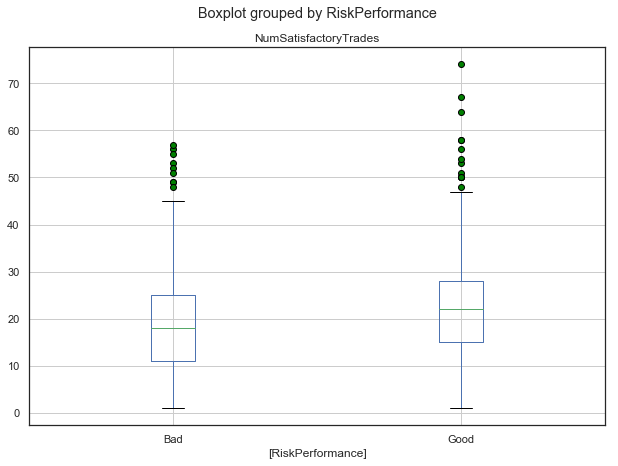

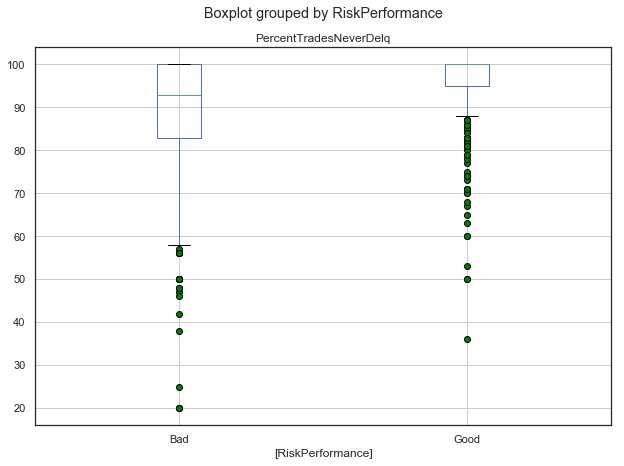

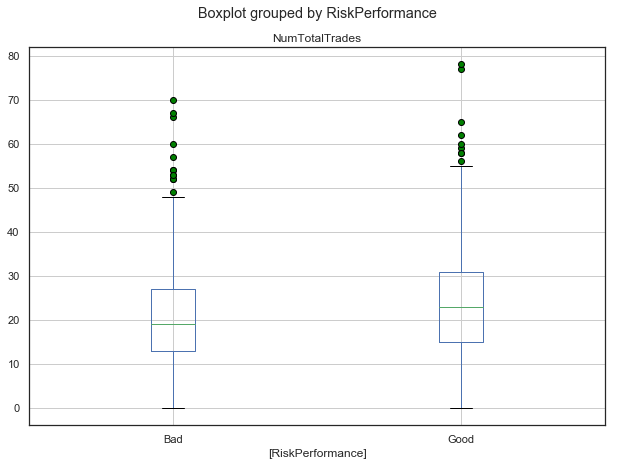

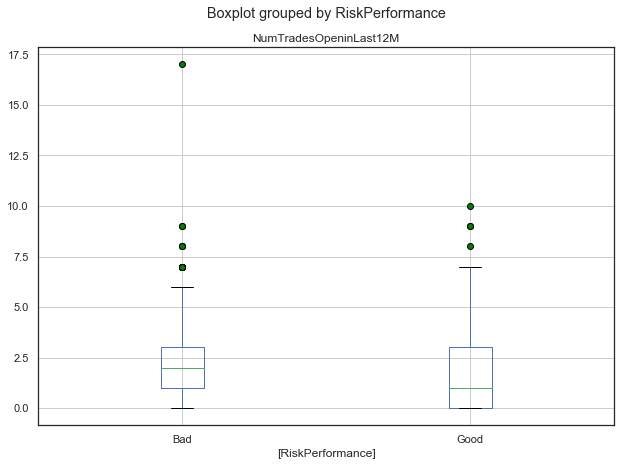

In [58]:
plt.figure()
flierprops = dict(marker='o', markerfacecolor='green', markersize=6,
                  linestyle='none')
df.boxplot(column=['MSinceOldestTradeOpen'], by=['RiskPerformance'], flierprops=flierprops, figsize=(10,7))
df.boxplot(column=['AverageMInFile'], by=['RiskPerformance'], flierprops=flierprops, figsize=(10,7))
df.boxplot(column=['NumSatisfactoryTrades'], by=['RiskPerformance'], flierprops=flierprops, figsize=(10,7))
df.boxplot(column=['PercentTradesNeverDelq'], by=['RiskPerformance'], flierprops=flierprops, figsize=(10,7))
df.boxplot(column=['NumTotalTrades'], by=['RiskPerformance'], flierprops=flierprops, figsize=(10,7))
df.boxplot(column=['NumTradesOpeninLast12M'], by=['RiskPerformance'], flierprops=flierprops, figsize=(10,7))

These box plot collections don't really present anything unexpected about the relationship of these features with RiskPerformance (higher values for all features except NumTradesOpeninLast12M seem to be associated with 'Good' RiskPerformance), other than that interestingly the majority of accounts with a 'Bad' RiskPerformance value still have an over 80% clean trade history, with the interquartile range even including the 100% value. NumTradesOpeninLast12M should increase the liklihood of a 'Bad' RiskPerformance, but this relationship does not seem to be very pronounced (if there at all) from looking at the boxplot collection for these features.

Next, we will investigate the interactions of our chosen continuous features with RiskPerformance using the small multiples histograms approach.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FFF7EA6BE0>]],
      dtype=object)

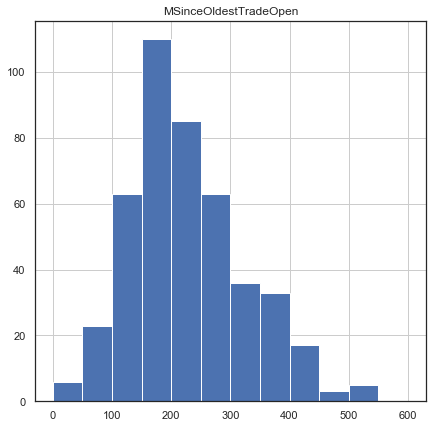

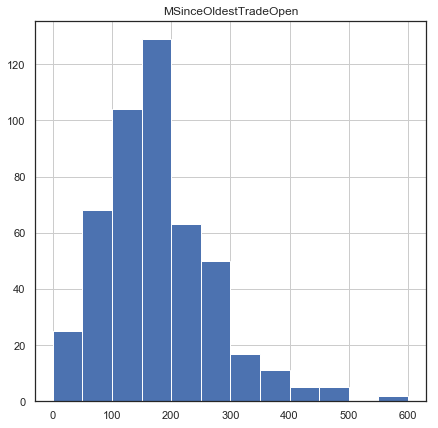

In [59]:
df[df['RiskPerformance'] == 'Good'][['MSinceOldestTradeOpen']].hist(figsize=(7,7), bins=[0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600])
df[df['RiskPerformance'] == 'Bad'][['MSinceOldestTradeOpen']].hist(figsize=(7,7), bins=[0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FFF7FE0DA0>]],
      dtype=object)

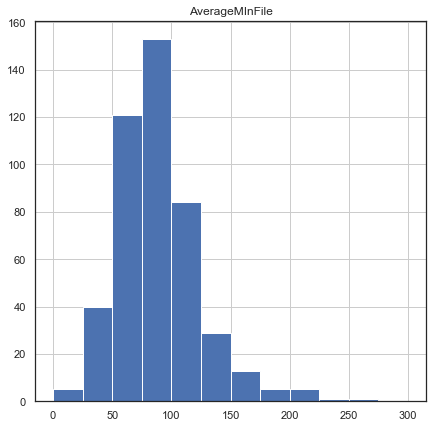

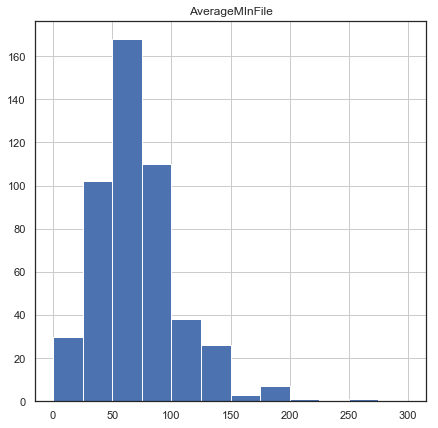

In [60]:
df[df['RiskPerformance'] == 'Good'][['AverageMInFile']].hist(figsize=(7,7), bins=[0, 25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300])
df[df['RiskPerformance'] == 'Bad'][['AverageMInFile']].hist(figsize=(7,7), bins=[0, 25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300])

The four small multiples histograms above indicate that account age is slightly positively correlated with a 'Good' value for RiskPerformance.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FFF8805208>]],
      dtype=object)

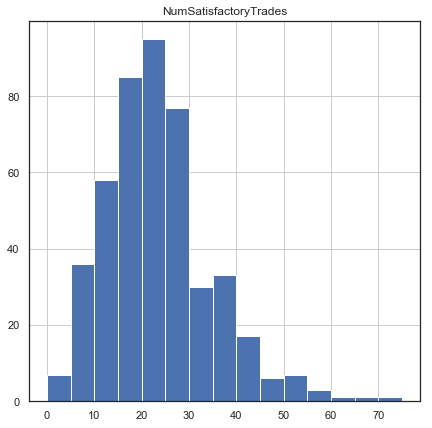

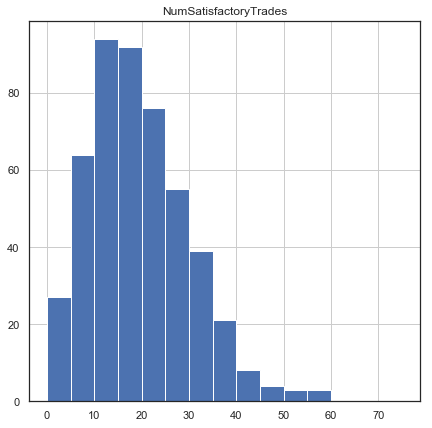

In [61]:
df[df['RiskPerformance'] == 'Good'][['NumSatisfactoryTrades']].hist(figsize=(7,7), bins=[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75])
df[df['RiskPerformance'] == 'Bad'][['NumSatisfactoryTrades']].hist(figsize=(7,7), bins=[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75])

Examining the plots for NumSatisfactoryTrades, we can see that accounts in the 20 satisfactory trades bin and below are significantly more likely to have a 'Bad' RiskPerformance value.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FFF800BBE0>]],
      dtype=object)

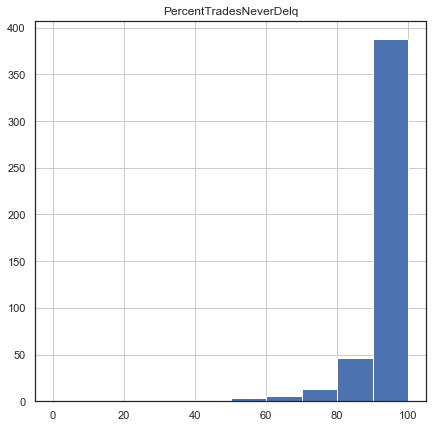

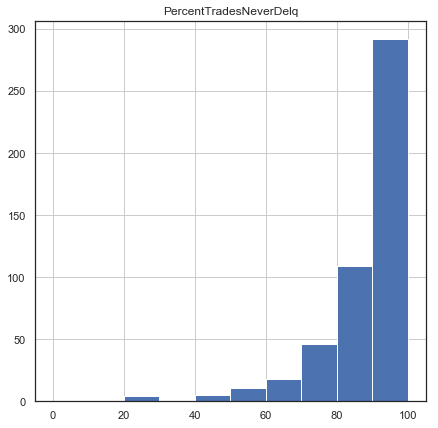

In [62]:
df[df['RiskPerformance'] == 'Good'][['PercentTradesNeverDelq']].hist(figsize=(7,7), bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
df[df['RiskPerformance'] == 'Bad'][['PercentTradesNeverDelq']].hist(figsize=(7,7), bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

The plots for PercentTradesNeverDelq, as expected, reveal that a higher percentage of trades never delinquent is correlated with a 'Good' value for RiskPerformance. Also, interestingly we can see that the majority accounts with 'Bad' RiskPerformance had a 90-100% perfect trade record.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FFF7E44438>]],
      dtype=object)

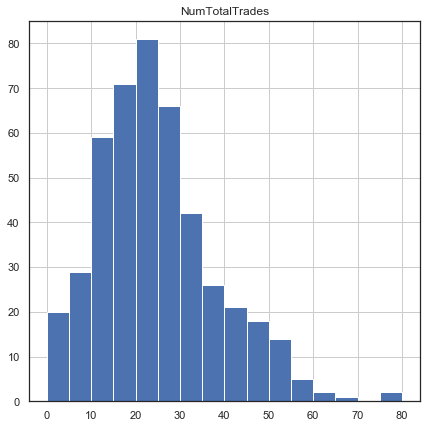

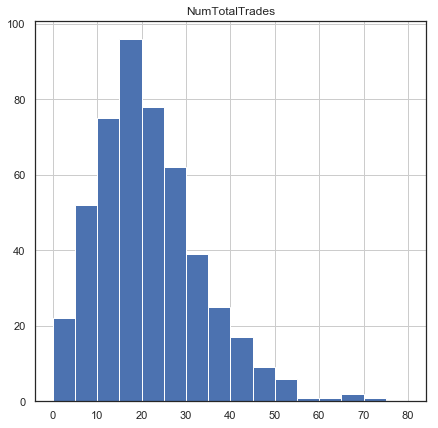

In [63]:
df[df['RiskPerformance'] == 'Good'][['NumTotalTrades']].hist(figsize=(7,7), bins=[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80])
df[df['RiskPerformance'] == 'Bad'][['NumTotalTrades']].hist(figsize=(7,7), bins=[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80])

From the plots for NumTotalTrades we can see that the majority of accounts with 'Bad' RiskPerformance had between 0 to 25 trades. Slightly less accounts with 'Good' RiskPerformance fit into this category.  

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FFF8B36278>]],
      dtype=object)

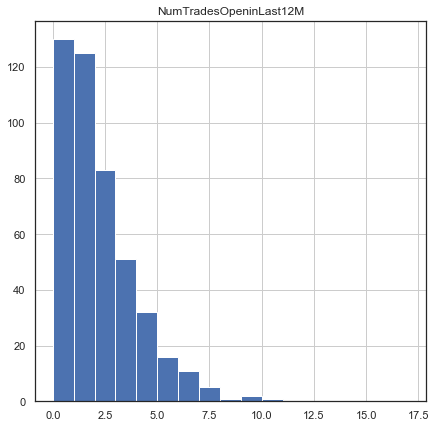

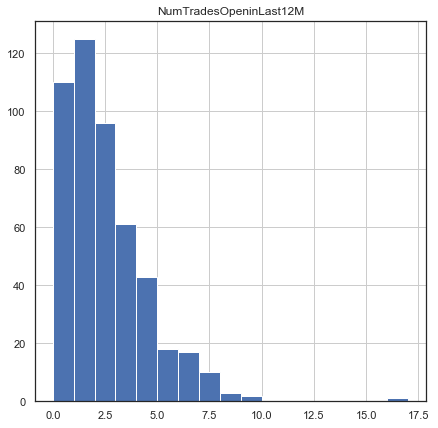

In [64]:
df[df['RiskPerformance'] == 'Good'][['NumTradesOpeninLast12M']].hist(figsize=(7,7), bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17])
df[df['RiskPerformance'] == 'Bad'][['NumTradesOpeninLast12M']].hist(figsize=(7,7), bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17])

The plots for NumTradesOpeninLast12M don't really seem to tell us anything, as the distribution of 'Good' versus 'Bad' RiskPerformance values seems to be quite similar for this feature, apart from one or two outliers.

### Discussion of Findings

In our investigation of the relationships between our continuous features, NumTotalTrades was found to be strongly positively correlated with MSinceOldestTradeOpen and weakly postively correlated with NumTradesOpeninLast12M (although for the latter, the correlation only appears to be linear until NumTradesOpeninLast12M reaches roughly 7.5). A somewhat exponential relationship was identified between NumSatisfactoryTrades and PercentTradesNeverDelq, weakened by the consistent appearance of 100 values for the latter across most of the range of values of the former.

Our stacked barcharts for correlation between categorical features did not provide much insight, as these seem to show that our target feature RiskPerformance does not have a clear linear relationship with any of the features investigated (which all contain at least mostly ordered categories, see data dictionary for the meanings of the integer values in MaxDelqEver and MaxDelq2PublicRecLast12M).

Our box plot collections for continuous-categorical correlation did not really present any unexpected information, other than that a surprisingly high proportion of accounts with a 'Bad' RiskPerformance value have a very high or perfect trade history (PercentTradesNeverDelq).

Our small multiples histograms provided some insights into the relationships between the investigated continuous features and RiskPerformance, revealing that older accounts are less likely to have 'Bad' RiskPerformance (a relationship that is generally supported by findings of this section), accounts with roughly less than 20 or less satisfactory trades are significantly more likely to have 'Bad' RiskPerformance and that the majority of accounts with 'Bad' RiskPerformance fall into or below the 25 bin for NumTotalTrades and into the 90-100 bin for PercentTradesNeverDelq.    

# (4). Transforming, extending and combining features
Transform, extend or combine the existing features to create a few new features (at least 3) with the aim to better capture the problem domain and the target outcome. Justify the steps and choices you are making. Add these features to your clean dataset and save it as a CSV file with a self explanatory name. 

We will now create the following new features with the aim of better predicting our target feature, RiskPerformance:
  - TradeFreq
  - NumTotalDelqTrades 
  - NumTotalTradesNeverDelq
      

### TradeFreq

TradeFreq will be a feature which combines NumTotalTrades and MSinceOldestTradeOpen in order to represent the frequency with which an account trades. This feature would be a useful addition to the dataset for two reasons: 
   - NumTotalTrades is ambiguous in respect to interpretation, as a high value for this feature could indicate that an account trades often, or it could indicate that an account trades infrequently but is simply quite old.
   - As MSinceOldestTradeOpen and NumTotalTrades are strongly correlated, it is likely that the true predictive strength of either of these features alone on the target feature will be overrepresented. 

TradeFreq will be calculated as: NumTotalTrades/(MSinceOldestTradeOpen+1))
   - The more trades an account has made in the shorter the space of time gives us the frequency of how often that account trades.
   - MSinceOldestTradeOpen has 1 added to prevent dividing by zero.

Note: The concept for this feature is inspired by the Duke Data Science entry for this challenge (http://dukedatasciencefico.cs.duke.edu/), but we have devised a different implementation to capture this concept.

In [65]:
df['TradeFreq'] = 0

In [66]:
#adding TradeFreq to continuous columns
continuous_columns = df[['TradeFreq','ExternalRiskEstimate','MSinceOldestTradeOpen','MSinceMostRecentTradeOpen','AverageMInFile','NumSatisfactoryTrades','NumTrades60Ever2DerogPubRec','NumTrades90Ever2DerogPubRec','PercentTradesNeverDelq','MSinceMostRecentDelq','NumTotalTrades','NumTradesOpeninLast12M','PercentInstallTrades','MSinceMostRecentInqexcl7days','NumInqLast6M','NetFractionRevolvingBurden','NumRevolvingTradesWBalance','NumInstallTradesWBalance','NumBank2NatlTradesWHighUtilization','PercentTradesWBalance']].columns

In [67]:
#calculating TradeFreq in each row
for i in df:
    df['TradeFreq'] = df['NumTotalTrades']/(df['MSinceOldestTradeOpen']+1)

In [68]:
df[['NumTotalTrades', 'MSinceOldestTradeOpen', 'TradeFreq']].head(5)

,NumTotalTrades,MSinceOldestTradeOpen,TradeFreq
0,20,147.0,0.135135
1,27,206.0,0.130435
2,20,166.0,0.119760
3,21,121.0,0.172131
4,18,178.0,0.100559


In order for the values for TradeFreq to fit in the better with the rest of the dataset, we will round them to the three decimal place and multiple them by 1000

In [69]:
for i in df:
    df['TradeFreq'] = round(df['NumTotalTrades']/(df['MSinceOldestTradeOpen']+1), 3)*1000

In [70]:
df[['NumTotalTrades', 'MSinceOldestTradeOpen', 'TradeFreq']].head(10)

,NumTotalTrades,MSinceOldestTradeOpen,TradeFreq
0,20,147.0,135.0
1,27,206.0,130.0
2,20,166.0,120.0
3,21,121.0,172.0
4,18,178.0,101.0
6,29,175.0,165.0
7,10,85.0,116.0
8,20,198.0,101.0
9,42,189.0,221.0
10,32,99.0,320.0


### NumTotalDelqTrades

NumTotalDelqTrades will be a feature combining NumTotalTrades and PercentTradesNeverDelq in order to represent the total number of delinquent trades on an account's record. This feature would be a positive addition to the dataset as:
   - The correlation between NumTotalTrades and the value for RiskPerformance being good is probably affected by the corresponding value of PercentTradesNeverDelq, and vice versa. Therefore, it would be useful to have a feature which captures the predictive effect of the interaction of these features on RiskPerformance.

NumTotalDelqTrade will be calculated as: NumTotalTrades*(100 - PercentTradesNeverDelq)/100
   - We find the percentage trades delinquent by subtracting PercentTradesNeverDelq from 100 and use this number to calculate the total number of delinquent trades. 

In [71]:
df['NumTotalDelqTrades'] = 0

In [72]:
#adding 'NumTotalDelqTrades' to continuous columns
continuous_columns = df[['NumTotalDelqTrades','TradeFreq','ExternalRiskEstimate','MSinceOldestTradeOpen','MSinceMostRecentTradeOpen','AverageMInFile','NumSatisfactoryTrades','NumTrades60Ever2DerogPubRec','NumTrades90Ever2DerogPubRec','PercentTradesNeverDelq','MSinceMostRecentDelq','NumTotalTrades','NumTradesOpeninLast12M','PercentInstallTrades','MSinceMostRecentInqexcl7days','NumInqLast6M','NetFractionRevolvingBurden','NumRevolvingTradesWBalance','NumInstallTradesWBalance','NumBank2NatlTradesWHighUtilization','PercentTradesWBalance']].columns

In [73]:
#calculating values for new feature in each row
for i in df:
    df['NumTotalDelqTrades'] = df['NumTotalTrades']*(100 - df['PercentTradesNeverDelq'])/100

In [74]:
df[['NumTotalTrades', 'PercentTradesNeverDelq', 'NumTotalDelqTrades']].head(10)

,NumTotalTrades,PercentTradesNeverDelq,NumTotalDelqTrades
0,20,100,0.00
1,27,100,0.00
2,20,100,0.00
3,21,95,1.05
4,18,100,0.00
6,29,100,0.00
7,10,100,0.00
8,20,100,0.00
9,42,78,9.24
10,32,100,0.00


We will now convert NumTotalDelqTrades to integer numbers as it does not make sense to have, for example, 9.24 Delinquent trades. This step is only neccesary due to inconsistency between NumTotalTrades and PercentTradesNeverDelq (PercentTradesNeverDelq of NumTotalTrades should always be an integer in the first place, but that is not the case with our data). We will also round up using numpy's ceiling function, as we assume that 99.6% delinquent trades still refers to at least one delinquency:

In [75]:
for i in df:
    df['NumTotalDelqTrades'] = np.ceil(df['NumTotalTrades']*(100 - df['PercentTradesNeverDelq'])/100)
    
df['NumTotalDelqTrades'] = df['NumTotalDelqTrades'].astype('int64')       
df[['NumTotalTrades', 'PercentTradesNeverDelq', 'NumTotalDelqTrades']].head(10)

,NumTotalTrades,PercentTradesNeverDelq,NumTotalDelqTrades
0,20,100,0
1,27,100,0
2,20,100,0
3,21,95,2
4,18,100,0
6,29,100,0
7,10,100,0
8,20,100,0
9,42,78,10
10,32,100,0


### NumTotalTradesNeverDelq

NumTotalTradesNeverDelq will be another feature combining NumTotalTrades and PercentTradesNeverDelq, but this time to represent the total number of non-delinquent trades in an account's history. This feature would be a positive addition to the dataset for the same reasoning as stated for NumTotalTradesDelq, which is that the predictive effects of NumTotalTrades and PercentTradesNeverDelq on RiskPerformance are highly interrelated.
   - For example, an account with a high value for NumTotalTrades is associated with 'Good' values for RiskPerformance, but as this feature does not differentiate between delinquent and never delinquent trades we have the non-ideal situation where a feature would predict that an account with a large number of trades which were all delinquent is lower risk than an account with a smaller number of trades of which none were ever delinquent.
   - Similarly, many of the 100% values for PercentTradesNeverDelq correspond to small values for NumTotalTrades, and it is debatable that an account that has only made one trade but has a 100% rate of non-delinquency should be considered lower risk than an account that has made a huge number of trades but only has a rate of 95%.    

NumTotalTradesNeverDelq will be calculated as: NumTotalTrades*(PercentTradesNeverDelq/100)
   - This is simply finding the percentage of all trades made by the account that were never delinquent. 

In [76]:
df['NumTotalTradesNeverDelq'] = 0

In [77]:
#adding 'NumTotalTradesNeverDelq' to continuous columns
continuous_columns = df[['NumTotalTradesNeverDelq','NumTotalDelqTrades','TradeFreq','ExternalRiskEstimate','MSinceOldestTradeOpen','MSinceMostRecentTradeOpen','AverageMInFile','NumSatisfactoryTrades','NumTrades60Ever2DerogPubRec','NumTrades90Ever2DerogPubRec','PercentTradesNeverDelq','MSinceMostRecentDelq','NumTotalTrades','NumTradesOpeninLast12M','PercentInstallTrades','MSinceMostRecentInqexcl7days','NumInqLast6M','NetFractionRevolvingBurden','NumRevolvingTradesWBalance','NumInstallTradesWBalance','NumBank2NatlTradesWHighUtilization','PercentTradesWBalance']].columns

In [78]:
#calculating new feature value for each row
for i in df:
    df['NumTotalTradesNeverDelq'] = df['NumTotalTrades']*(df['PercentTradesNeverDelq']/100)
    
df['NumTotalTradesNeverDelq'] = df['NumTotalTradesNeverDelq'].astype('int64') #converting to integers

In [79]:
df[['NumTotalTrades', 'PercentTradesNeverDelq', 'NumTotalTradesNeverDelq']].head(10)

,NumTotalTrades,PercentTradesNeverDelq,NumTotalTradesNeverDelq
0,20,100,20
1,27,100,27
2,20,100,20
3,21,95,19
4,18,100,18
6,29,100,29
7,10,100,10
8,20,100,20
9,42,78,32
10,32,100,32


### Evaluation of New Features

Let us investigate the predictive strength of our new features. We will do this by getting the standard correlation between each new feature and a dummy version of RiskPerformance (as seen earlier in this notebook):

In [80]:
#converting RiskPerformance to a dummy variable to measure correlation with continuous features, reference: https://stackoverflow.com/questions/44694228/how-to-check-for-correlation-among-continuous-and-categorical-variables-in-pytho
dummies = pd.get_dummies(df['RiskPerformance'])
del dummies[dummies.columns[-1]]
temp_df = df
df_with_dummies = pd.concat([temp_df, dummies], axis=1)
del df_with_dummies['RiskPerformance']
df_with_dummies.rename(columns={"Bad": "RiskPerformanceDummy"}, inplace=True)
df_with_dummies['RiskPerformanceDummy'] = df_with_dummies['RiskPerformanceDummy'].astype('int64')

In [81]:
print("TradeFreq and 'Bad' RiskPerformance correlation:", round(df_with_dummies['TradeFreq'].corr(df_with_dummies['RiskPerformanceDummy'], method='pearson'), 2))
print("NumTotalTrades and 'Bad' RiskPerformance correlation:",round(df_with_dummies['NumTotalTrades'].corr(df_with_dummies['RiskPerformanceDummy'], method='pearson'), 2))
print("MSinceOldestTradeOpen and 'Bad' RiskPerformance correlation:",round(df_with_dummies['MSinceOldestTradeOpen'].corr(df_with_dummies['RiskPerformanceDummy'], method='pearson'), 2))

TradeFreq and 'Bad' RiskPerformance correlation: 0.09
NumTotalTrades and 'Bad' RiskPerformance correlation: -0.13
MSinceOldestTradeOpen and 'Bad' RiskPerformance correlation: -0.26


The standard correlation between TradeFreq and a 'Bad' value for RiskPerformanceDummy is roughly 0.09 compared to -0.13 for NumTotalTrades and -0.26 for MSinceOldestTradeOpen.

In [82]:
print("NumTotalDelqTrades and 'Bad' RiskPerformance correlation:",round(df_with_dummies['NumTotalDelqTrades'].corr(df_with_dummies['RiskPerformanceDummy'], method='pearson'), 2))
print("NumTotalTrades and 'Bad' RiskPerformance correlation:",round(df_with_dummies['NumTotalTrades'].corr(df_with_dummies['RiskPerformanceDummy'], method='pearson'), 2))
print("PercentTradesNeverDelq and 'Bad' RiskPerformance correlation:",round(df_with_dummies['PercentTradesNeverDelq'].corr(df_with_dummies['RiskPerformanceDummy'], method='pearson'), 2))

NumTotalDelqTrades and 'Bad' RiskPerformance correlation: 0.25
NumTotalTrades and 'Bad' RiskPerformance correlation: -0.13
PercentTradesNeverDelq and 'Bad' RiskPerformance correlation: -0.28


NumTotalDelqTrades has a higher standard correlation with 'Bad' values for RiskPerformance than NumTotalTrades has with 'Good' Values, although PercentTradesNeverDelq is just barely a stronger predictor than our new feature.  

In [83]:
print("NumTotalTradesNeverDelq and 'Bad' RiskPerformance correlation:",round(df_with_dummies['NumTotalTradesNeverDelq'].corr(df_with_dummies['RiskPerformanceDummy'], method='pearson'), 2))
print("NumTotalTrades and 'Bad' RiskPerformance correlation:",round(df_with_dummies['NumTotalTrades'].corr(df_with_dummies['RiskPerformanceDummy'], method='pearson'), 2))
print("PercentTradesNeverDelq and 'Bad' RiskPerformance correlation:",round(df_with_dummies['PercentTradesNeverDelq'].corr(df_with_dummies['RiskPerformanceDummy'], method='pearson'), 2))

NumTotalTradesNeverDelq and 'Bad' RiskPerformance correlation: -0.18
NumTotalTrades and 'Bad' RiskPerformance correlation: -0.13
PercentTradesNeverDelq and 'Bad' RiskPerformance correlation: -0.28


NumTotalTradesNeverDelq is slightly stronger as a predictor of 'Bad' RiskPerformance than NumTotalTradesNever, but weaker than PercentTradesNeverDelq.

We will now save the updated dataframe with our new features included to a new csv file. 

In [84]:
df.to_csv('NewFeatures.csv', index=False)